# beijing

In [208]:
import requests
start = '2018-04-11-0'
# start = '2018-05-01-0'
end   = '2018-05-28-23'
url = 'https://biendata.com/competition/airquality/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('aq finished!')
url = 'https://biendata.com/competition/meteorology/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('meo finished!')
url = 'https://biendata.com/competition/meteorology/bj_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('grid finished!')

aq finished!
meo finished!
grid finished!


In [211]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    recons_meo.drop_duplicates(inplace=True)
    recons_meo.reset_index(drop=True,inplace=True)
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[recons_meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[recons_meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[recons_meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[recons_meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[recons_meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[recons_meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[recons_meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[recons_meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Thundershower' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Light Rain' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    print(pop_list)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72  ####预测间隔
    for i in tqdm(range(68,272)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-68)%6 == 0 or (i-68)%6 == 1 or (i-68)%6 == 4):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [212]:
Start = datetime.strptime("2018-04-11 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-28 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 20086/20086 [00:00<00:00, 1361542.28it/s]


380
272
380
380


  0%|          | 0/1152 [00:00<?, ?it/s]

1630
380
1485
380


100%|██████████| 1152/1152 [20:09<00:00,  1.05s/it]


['2018-05-25 20:00:00', '2018-05-03 19:00:00', '2018-05-05 19:00:00', '2018-05-25 22:00:00', '2018-05-20 20:00:00', '2018-05-05 13:00:00', '2018-04-12 05:00:00', '2018-04-19 12:00:00', '2018-04-18 10:00:00', '2018-04-15 13:00:00', '2018-05-20 19:00:00', '2018-05-20 23:00:00', '2018-05-05 10:00:00', '2018-05-20 22:00:00', '2018-05-20 15:00:00', '2018-05-05 15:00:00', '2018-05-05 12:00:00', '2018-05-05 14:00:00', '2018-04-15 11:00:00', '2018-05-20 17:00:00', '2018-05-05 21:00:00', '2018-05-05 18:00:00', '2018-05-25 23:00:00', '2018-04-19 07:00:00', '2018-05-05 23:00:00', '2018-05-20 21:00:00', '2018-05-03 20:00:00', '2018-05-03 18:00:00', '2018-04-22 10:00:00', '2018-04-19 06:00:00', '2018-05-25 21:00:00', '2018-05-05 16:00:00', '2018-05-07 09:00:00', '2018-05-10 20:00:00', '2018-05-20 14:00:00', '2018-04-12 04:00:00', '2018-05-20 16:00:00', '2018-05-05 22:00:00', '2018-05-05 17:00:00', '2018-05-05 20:00:00', '2018-05-20 18:00:00', '2018-05-05 11:00:00']
12093
380


100%|██████████| 204/204 [00:02<00:00, 90.41it/s]


22002
12207
22002
22002


In [213]:
pre_list_bj.shape

(1032, 22002)

In [214]:
pre_frame_bj.index

Index(['2018-04-13 00:00:00', '2018-04-13 01:00:00', '2018-04-13 02:00:00',
       '2018-04-13 03:00:00', '2018-04-13 04:00:00', '2018-04-13 05:00:00',
       '2018-04-13 06:00:00', '2018-04-13 07:00:00', '2018-04-13 08:00:00',
       '2018-04-13 09:00:00',
       ...
       '2018-05-25 14:00:00', '2018-05-25 15:00:00', '2018-05-25 16:00:00',
       '2018-05-25 17:00:00', '2018-05-25 18:00:00', '2018-05-25 19:00:00',
       '2018-05-25 20:00:00', '2018-05-25 21:00:00', '2018-05-25 22:00:00',
       '2018-05-25 23:00:00'],
      dtype='object', length=1032)

In [215]:
pre_frame_bj.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj.csv')

# London

In [209]:
# start = '2018-05-01-0'
start = '2018-04-12-0'
end   = '2018-05-28-23'
url = 'https://biendata.com/competition/airquality/ld/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('aq finished!')

url = 'https://biendata.com/competition/meteorology/ld_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('grid finished!')

aq finished!
grid finished!


In [216]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
#     print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
#     print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace=True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72
    for i in tqdm(range(26,65)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-26)%3 == 0 or (i-26)%3 == 1):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [217]:
Start = datetime.strptime("2018-04-12 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-28 23:00:00", "%Y-%m-%d %H:%M:%S")
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 14508/14508 [00:00<00:00, 1531034.41it/s]


65
0
65
65


  0%|          | 0/1128 [00:00<?, ?it/s]

265
65


100%|██████████| 1128/1128 [07:15<00:00,  2.59it/s]


2185
65


100%|██████████| 39/39 [00:00<00:00, 60.30it/s]


4091
2217
4091
4091


In [218]:
pre_list_ld.shape

(1008, 4091)

In [219]:
pre_frame_ld.index

Index(['2018-04-14 00:00:00', '2018-04-14 01:00:00', '2018-04-14 02:00:00',
       '2018-04-14 03:00:00', '2018-04-14 04:00:00', '2018-04-14 05:00:00',
       '2018-04-14 06:00:00', '2018-04-14 07:00:00', '2018-04-14 08:00:00',
       '2018-04-14 09:00:00',
       ...
       '2018-05-25 14:00:00', '2018-05-25 15:00:00', '2018-05-25 16:00:00',
       '2018-05-25 17:00:00', '2018-05-25 18:00:00', '2018-05-25 19:00:00',
       '2018-05-25 20:00:00', '2018-05-25 21:00:00', '2018-05-25 22:00:00',
       '2018-05-25 23:00:00'],
      dtype='object', length=1008)

In [220]:
pre_frame_ld.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld.csv')

In [193]:
import pandas as pd
import numpy as np
beijing_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj.csv'))[:,1:]
London_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld.csv'))[:,1:]
def sMAPE(preds, xgb_train):   
    s = 0
    label = xgb_train.get_label()
    length = len(label)
    for i in range(length):
        s += float(np.abs(preds[i] - label[i]))/ (float(np.abs(preds[i]) + np.abs(label[i])) / 2.)
    sMAPE = s/float(length)
    return 'sMAPE',float(sMAPE)

# MODEL BJ

In [194]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
# train_data, val_data = train_test_split(beijing_train, test_size = 0.3, random_state = 1)###随机数原始为1
train_data, val_data = beijing_train[:-48,:], beijing_train[-48:,:]###随机数原始为1

In [413]:
a = 64
b= np.abs(a)
print(type(a))
print(type(b))
print(type(float(b)))

<class 'int'>
<class 'numpy.int64'>
<class 'float'>


# PM2.5

  0%|          | 0/34 [00:00<?, ?it/s]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.376	val-gamma-nloglik:161.55	train-sMAPE:1.94179	val-sMAPE:1.96333
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94753	val-gamma-nloglik:5.66046	train-sMAPE:0.050832	val-sMAPE:0.443284
Stopping. Best iteration:
[118]	train-gamma-nloglik:4.9465	val-gamma-nloglik:5.65557	train-sMAPE:0.036662	val-sMAPE:0.437847



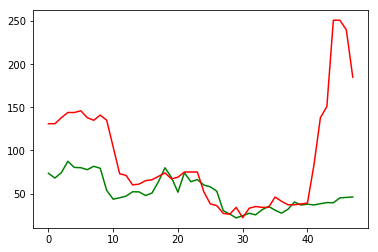

  3%|▎         | 1/34 [00:13<07:34, 13.76s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:113.253	val-gamma-nloglik:197.774	train-sMAPE:1.9357	val-sMAPE:1.97026
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.85676	val-gamma-nloglik:6.0542	train-sMAPE:0.068698	val-sMAPE:0.587846
[200]	train-gamma-nloglik:4.85334	val-gamma-nloglik:6.03543	train-sMAPE:0.022843	val-sMAPE:0.585117
Stopping. Best iteration:
[202]	train-gamma-nloglik:4.85333	val-gamma-nloglik:6.03504	train-sMAPE:0.022591	val-sMAPE:0.584817



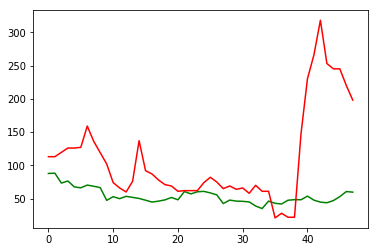

  6%|▌         | 2/34 [00:32<08:42, 16.32s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.192	val-gamma-nloglik:124.099	train-sMAPE:1.9273	val-sMAPE:1.95263
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.78795	val-gamma-nloglik:5.36074	train-sMAPE:0.055068	val-sMAPE:0.456175
Stopping. Best iteration:
[76]	train-gamma-nloglik:4.79534	val-gamma-nloglik:5.35161	train-sMAPE:0.110298	val-sMAPE:0.450544



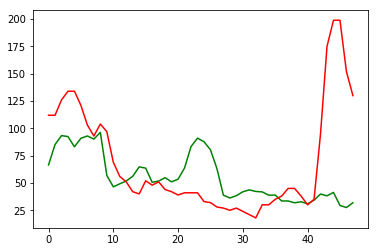

  9%|▉         | 3/34 [00:43<07:32, 14.60s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:109.515	val-gamma-nloglik:125.518	train-sMAPE:1.93912	val-sMAPE:1.95273
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.87457	val-gamma-nloglik:5.27105	train-sMAPE:0.057388	val-sMAPE:0.439019
Stopping. Best iteration:
[91]	train-gamma-nloglik:4.87595	val-gamma-nloglik:5.26634	train-sMAPE:0.070175	val-sMAPE:0.435922



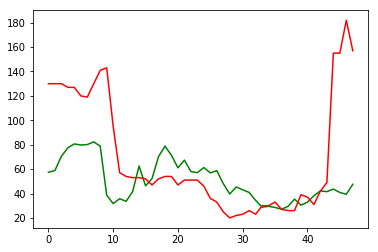

 12%|█▏        | 4/34 [00:55<06:59, 13.97s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:103.232	val-gamma-nloglik:115.16	train-sMAPE:1.90406	val-sMAPE:1.93144
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.65975	val-gamma-nloglik:5.35655	train-sMAPE:0.080052	val-sMAPE:0.631487
Stopping. Best iteration:
[80]	train-gamma-nloglik:4.66683	val-gamma-nloglik:5.36344	train-sMAPE:0.12158	val-sMAPE:0.617603



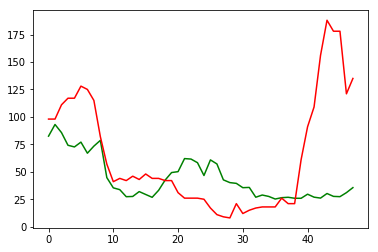

 15%|█▍        | 5/34 [01:07<06:30, 13.47s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:111.286	val-gamma-nloglik:115.366	train-sMAPE:1.92218	val-sMAPE:1.95289
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.80719	val-gamma-nloglik:5.28962	train-sMAPE:0.072785	val-sMAPE:0.427169
Stopping. Best iteration:
[109]	train-gamma-nloglik:4.8062	val-gamma-nloglik:5.27975	train-sMAPE:0.063628	val-sMAPE:0.422179



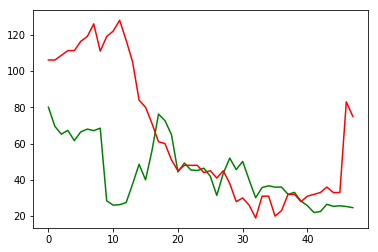

 18%|█▊        | 6/34 [01:20<06:15, 13.41s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.732	val-gamma-nloglik:181.245	train-sMAPE:1.93878	val-sMAPE:1.9696
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94875	val-gamma-nloglik:5.94271	train-sMAPE:0.049326	val-sMAPE:0.58667
Stopping. Best iteration:
[98]	train-gamma-nloglik:4.949	val-gamma-nloglik:5.94113	train-sMAPE:0.052464	val-sMAPE:0.583817



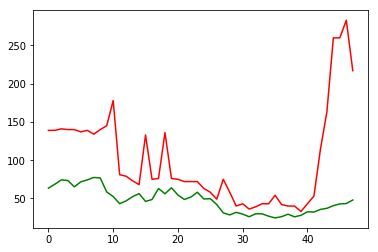

 21%|██        | 7/34 [01:33<05:58, 13.29s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:115.237	val-gamma-nloglik:120.943	train-sMAPE:1.92882	val-sMAPE:1.95097
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.81945	val-gamma-nloglik:5.1436	train-sMAPE:0.063266	val-sMAPE:0.41655
Stopping. Best iteration:
[80]	train-gamma-nloglik:4.82713	val-gamma-nloglik:5.14567	train-sMAPE:0.115032	val-sMAPE:0.401698



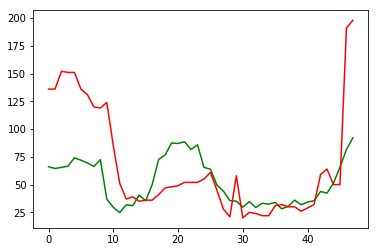

 24%|██▎       | 8/34 [01:44<05:40, 13.08s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:110.754	val-gamma-nloglik:136.639	train-sMAPE:1.93331	val-sMAPE:1.96299
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8412	val-gamma-nloglik:5.37862	train-sMAPE:0.050418	val-sMAPE:0.390092
[200]	train-gamma-nloglik:4.83928	val-gamma-nloglik:5.37234	train-sMAPE:0.015053	val-sMAPE:0.381418
Stopping. Best iteration:
[193]	train-gamma-nloglik:4.83931	val-gamma-nloglik:5.37166	train-sMAPE:0.016165	val-sMAPE:0.380782



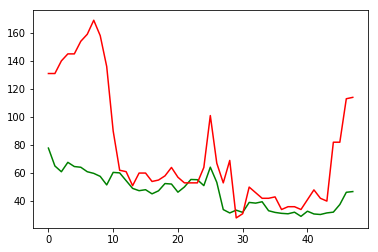

 26%|██▋       | 9/34 [02:02<05:41, 13.65s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:135.348	val-gamma-nloglik:174.079	train-sMAPE:1.94787	val-sMAPE:1.95594
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.07458	val-gamma-nloglik:5.64832	train-sMAPE:0.065453	val-sMAPE:0.469288
[200]	train-gamma-nloglik:5.07144	val-gamma-nloglik:5.64298	train-sMAPE:0.023631	val-sMAPE:0.460891
[300]	train-gamma-nloglik:5.07112	val-gamma-nloglik:5.64021	train-sMAPE:0.01202	val-sMAPE:0.45933
[400]	train-gamma-nloglik:5.07104	val-gamma-nloglik:5.64004	train-sMAPE:0.006479	val-sMAPE:0.458822
Stopping. Best iteration:
[377]	train-gamma-nloglik:5.07106	val-gamma-nloglik:5.63989	train-sMAPE:0.0075	val-sMAPE:0.458648



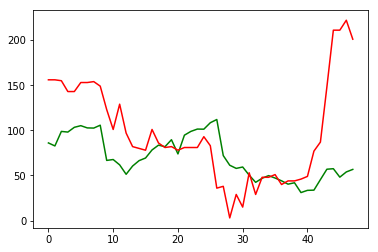

 29%|██▉       | 10/34 [02:32<06:06, 15.26s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.95	val-gamma-nloglik:172.576	train-sMAPE:1.94069	val-sMAPE:1.96487
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.93726	val-gamma-nloglik:5.85248	train-sMAPE:0.059672	val-sMAPE:0.572433
Stopping. Best iteration:
[113]	train-gamma-nloglik:4.93618	val-gamma-nloglik:5.8438	train-sMAPE:0.046809	val-sMAPE:0.571302



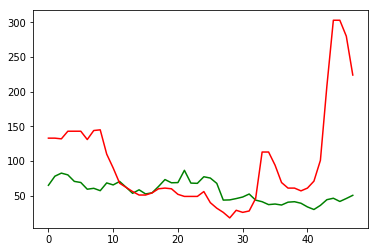

 32%|███▏      | 11/34 [02:46<05:47, 15.10s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:129.41	val-gamma-nloglik:142.739	train-sMAPE:1.94666	val-sMAPE:1.96444
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.02357	val-gamma-nloglik:5.38023	train-sMAPE:0.055104	val-sMAPE:0.410363
Stopping. Best iteration:
[77]	train-gamma-nloglik:5.03151	val-gamma-nloglik:5.38559	train-sMAPE:0.112989	val-sMAPE:0.399793



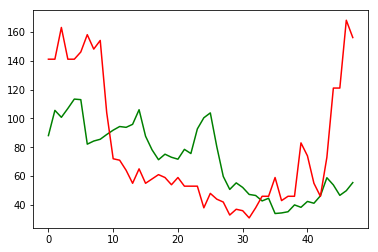

 35%|███▌      | 12/34 [02:57<05:25, 14.79s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:104.172	val-gamma-nloglik:121.761	train-sMAPE:1.92209	val-sMAPE:1.95731
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.74107	val-gamma-nloglik:5.35375	train-sMAPE:0.058772	val-sMAPE:0.447036
Stopping. Best iteration:
[91]	train-gamma-nloglik:4.74271	val-gamma-nloglik:5.35221	train-sMAPE:0.073963	val-sMAPE:0.444166



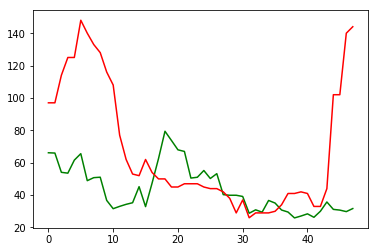

 38%|███▊      | 13/34 [03:09<05:06, 14.59s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:133.665	val-gamma-nloglik:140.827	train-sMAPE:1.93149	val-sMAPE:1.95979
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98989	val-gamma-nloglik:5.25803	train-sMAPE:0.06594	val-sMAPE:0.347326
Stopping. Best iteration:
[70]	train-gamma-nloglik:5.01097	val-gamma-nloglik:5.27185	train-sMAPE:0.164666	val-sMAPE:0.335436



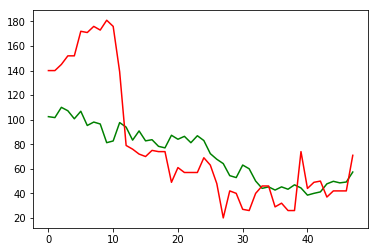

 41%|████      | 14/34 [03:20<04:46, 14.32s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:114.317	val-gamma-nloglik:97.383	train-sMAPE:1.9339	val-sMAPE:1.9431
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.85382	val-gamma-nloglik:4.89438	train-sMAPE:0.05969	val-sMAPE:0.408324
Stopping. Best iteration:
[58]	train-gamma-nloglik:4.94107	val-gamma-nloglik:4.87304	train-sMAPE:0.293422	val-sMAPE:0.308329



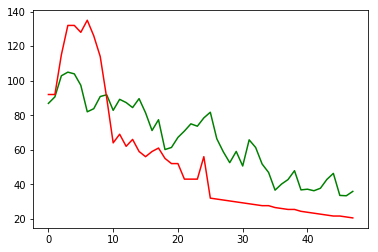

 44%|████▍     | 15/34 [03:30<04:27, 14.06s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:110.361	val-gamma-nloglik:181.128	train-sMAPE:1.92572	val-sMAPE:1.96912
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.78895	val-gamma-nloglik:6.49578	train-sMAPE:0.056187	val-sMAPE:0.769982
Stopping. Best iteration:
[128]	train-gamma-nloglik:4.78741	val-gamma-nloglik:6.49538	train-sMAPE:0.036018	val-sMAPE:0.765284



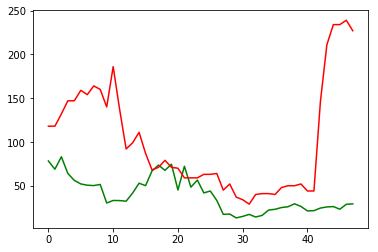

 47%|████▋     | 16/34 [03:45<04:13, 14.11s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:95.7083	val-gamma-nloglik:138.674	train-sMAPE:1.91704	val-sMAPE:1.95779
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.65421	val-gamma-nloglik:5.96797	train-sMAPE:0.054418	val-sMAPE:0.665541
Stopping. Best iteration:
[110]	train-gamma-nloglik:4.65351	val-gamma-nloglik:5.95199	train-sMAPE:0.046292	val-sMAPE:0.660983



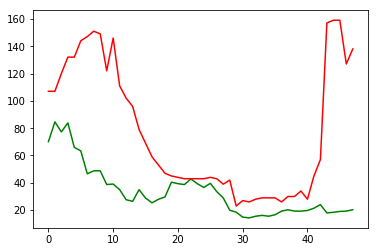

 50%|█████     | 17/34 [03:59<03:59, 14.07s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:109.693	val-gamma-nloglik:109.229	train-sMAPE:1.92891	val-sMAPE:1.94309
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.79761	val-gamma-nloglik:5.23385	train-sMAPE:0.059616	val-sMAPE:0.439427
Stopping. Best iteration:
[96]	train-gamma-nloglik:4.79827	val-gamma-nloglik:5.23174	train-sMAPE:0.066155	val-sMAPE:0.436168



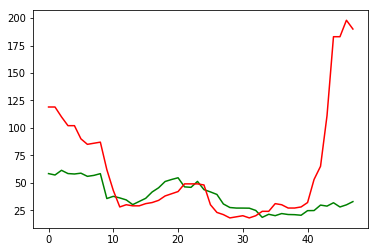

 53%|█████▎    | 18/34 [04:11<03:43, 13.98s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:113.135	val-gamma-nloglik:130.707	train-sMAPE:1.93602	val-sMAPE:1.95523
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.88518	val-gamma-nloglik:5.25273	train-sMAPE:0.050259	val-sMAPE:0.352424
Stopping. Best iteration:
[82]	train-gamma-nloglik:4.88898	val-gamma-nloglik:5.25787	train-sMAPE:0.084582	val-sMAPE:0.350209



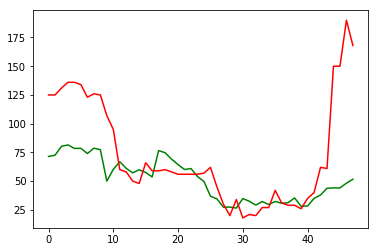

 56%|█████▌    | 19/34 [04:23<03:28, 13.87s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.253	val-gamma-nloglik:141.444	train-sMAPE:1.92248	val-sMAPE:1.95944
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.76752	val-gamma-nloglik:5.65416	train-sMAPE:0.056591	val-sMAPE:0.514316
Stopping. Best iteration:
[85]	train-gamma-nloglik:4.77058	val-gamma-nloglik:5.66564	train-sMAPE:0.083625	val-sMAPE:0.511423



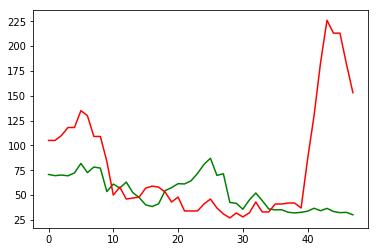

 59%|█████▉    | 20/34 [04:35<03:12, 13.77s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:108.416	val-gamma-nloglik:105.492	train-sMAPE:1.93293	val-sMAPE:1.94581
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.82857	val-gamma-nloglik:5.02186	train-sMAPE:0.062897	val-sMAPE:0.349627
[200]	train-gamma-nloglik:4.82574	val-gamma-nloglik:5.01761	train-sMAPE:0.022189	val-sMAPE:0.347998
Stopping. Best iteration:
[170]	train-gamma-nloglik:4.82599	val-gamma-nloglik:5.01586	train-sMAPE:0.028415	val-sMAPE:0.34615



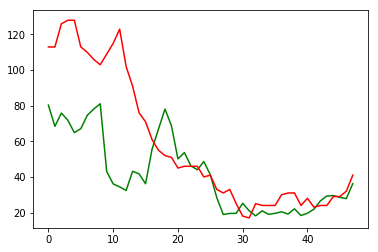

 62%|██████▏   | 21/34 [04:52<03:00, 13.92s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:114.069	val-gamma-nloglik:136.808	train-sMAPE:1.91568	val-sMAPE:1.95668
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8156	val-gamma-nloglik:5.55639	train-sMAPE:0.064315	val-sMAPE:0.46115
Stopping. Best iteration:
[100]	train-gamma-nloglik:4.8156	val-gamma-nloglik:5.55639	train-sMAPE:0.064315	val-sMAPE:0.46115



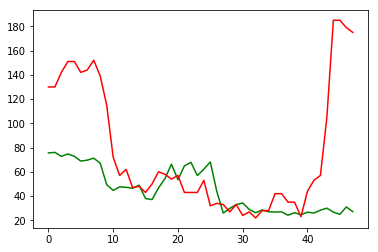

 65%|██████▍   | 22/34 [05:04<02:46, 13.86s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.983	val-gamma-nloglik:140.231	train-sMAPE:1.93915	val-sMAPE:1.96046
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.9305	val-gamma-nloglik:5.41691	train-sMAPE:0.056733	val-sMAPE:0.432707
Stopping. Best iteration:
[87]	train-gamma-nloglik:4.93257	val-gamma-nloglik:5.42179	train-sMAPE:0.075056	val-sMAPE:0.431574



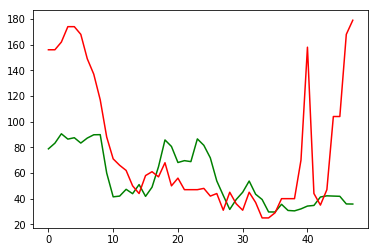

 68%|██████▊   | 23/34 [05:17<02:31, 13.79s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.701	val-gamma-nloglik:128.858	train-sMAPE:1.93952	val-sMAPE:1.95363
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8551	val-gamma-nloglik:5.29848	train-sMAPE:0.060758	val-sMAPE:0.461538
Stopping. Best iteration:
[77]	train-gamma-nloglik:4.86202	val-gamma-nloglik:5.31865	train-sMAPE:0.109261	val-sMAPE:0.455224



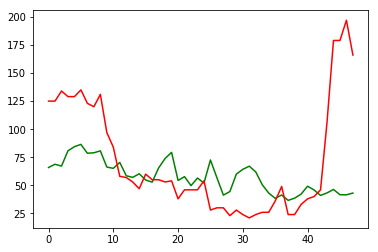

 71%|███████   | 24/34 [05:28<02:16, 13.69s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:117.49	val-gamma-nloglik:121.115	train-sMAPE:1.94	val-sMAPE:1.96205
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94726	val-gamma-nloglik:5.2658	train-sMAPE:0.052202	val-sMAPE:0.358315
Stopping. Best iteration:
[93]	train-gamma-nloglik:4.94824	val-gamma-nloglik:5.26509	train-sMAPE:0.062216	val-sMAPE:0.357844



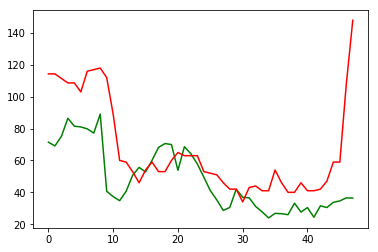

 74%|███████▎  | 25/34 [05:40<02:02, 13.64s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:112.675	val-gamma-nloglik:149.449	train-sMAPE:1.92989	val-sMAPE:1.96189
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8349	val-gamma-nloglik:5.62156	train-sMAPE:0.062398	val-sMAPE:0.531554
[200]	train-gamma-nloglik:4.83207	val-gamma-nloglik:5.61242	train-sMAPE:0.020678	val-sMAPE:0.527162
Stopping. Best iteration:
[216]	train-gamma-nloglik:4.83199	val-gamma-nloglik:5.61228	train-sMAPE:0.018101	val-sMAPE:0.526856



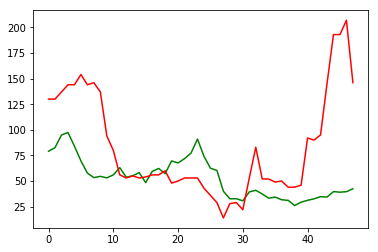

 76%|███████▋  | 26/34 [06:00<01:50, 13.87s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:114.623	val-gamma-nloglik:133.509	train-sMAPE:1.93601	val-sMAPE:1.9537
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.88824	val-gamma-nloglik:5.30699	train-sMAPE:0.055986	val-sMAPE:0.441898
Stopping. Best iteration:
[73]	train-gamma-nloglik:4.89955	val-gamma-nloglik:5.33265	train-sMAPE:0.127971	val-sMAPE:0.437723



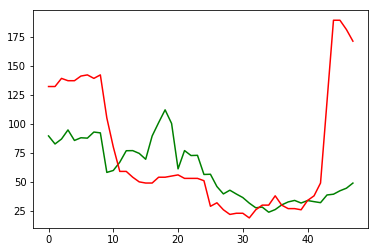

 79%|███████▉  | 27/34 [06:11<01:36, 13.77s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:133.382	val-gamma-nloglik:151.168	train-sMAPE:1.94687	val-sMAPE:1.96207
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.04759	val-gamma-nloglik:5.41471	train-sMAPE:0.058088	val-sMAPE:0.363899
Stopping. Best iteration:
[80]	train-gamma-nloglik:5.05326	val-gamma-nloglik:5.42283	train-sMAPE:0.101339	val-sMAPE:0.351124



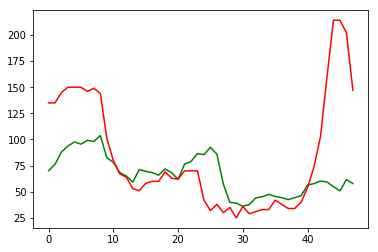

 82%|████████▏ | 28/34 [06:23<01:22, 13.69s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:118.329	val-gamma-nloglik:349.226	train-sMAPE:1.937	val-sMAPE:1.98198
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.91011	val-gamma-nloglik:7.83606	train-sMAPE:0.063201	val-sMAPE:1.00935
Stopping. Best iteration:
[141]	train-gamma-nloglik:4.90772	val-gamma-nloglik:7.77659	train-sMAPE:0.033769	val-sMAPE:0.9983



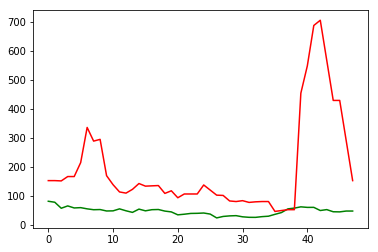

 85%|████████▌ | 29/34 [06:38<01:08, 13.74s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.592	val-gamma-nloglik:173.048	train-sMAPE:1.93498	val-sMAPE:1.97262
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.84427	val-gamma-nloglik:6.23886	train-sMAPE:0.057411	val-sMAPE:0.712059
[200]	train-gamma-nloglik:4.84167	val-gamma-nloglik:6.22494	train-sMAPE:0.019316	val-sMAPE:0.696136
[300]	train-gamma-nloglik:4.84145	val-gamma-nloglik:6.224	train-sMAPE:0.009894	val-sMAPE:0.693371
[400]	train-gamma-nloglik:4.8414	val-gamma-nloglik:6.22347	train-sMAPE:0.005566	val-sMAPE:0.692869
Stopping. Best iteration:
[412]	train-gamma-nloglik:4.8414	val-gamma-nloglik:6.22336	train-sMAPE:0.005213	val-sMAPE:0.692756



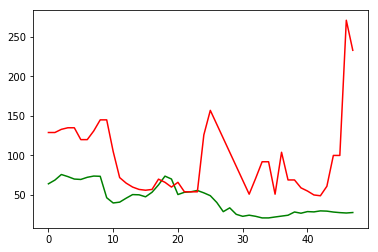

 88%|████████▊ | 30/34 [07:09<00:57, 14.33s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:108.288	val-gamma-nloglik:95.9219	train-sMAPE:1.90793	val-sMAPE:1.90782
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.73116	val-gamma-nloglik:4.97091	train-sMAPE:0.068021	val-sMAPE:0.582831
Stopping. Best iteration:
[78]	train-gamma-nloglik:4.73933	val-gamma-nloglik:5.04137	train-sMAPE:0.118722	val-sMAPE:0.573775



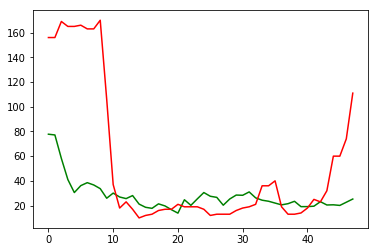

 91%|█████████ | 31/34 [07:21<00:42, 14.23s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:125.912	val-gamma-nloglik:120.068	train-sMAPE:1.94924	val-sMAPE:1.96123
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.04941	val-gamma-nloglik:5.17816	train-sMAPE:0.062493	val-sMAPE:0.2833
Stopping. Best iteration:
[66]	train-gamma-nloglik:5.07883	val-gamma-nloglik:5.17216	train-sMAPE:0.187664	val-sMAPE:0.233134



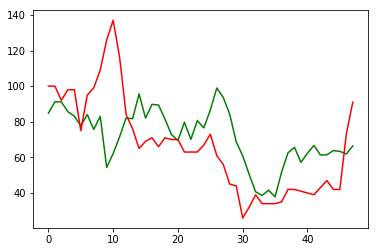

 94%|█████████▍| 32/34 [07:31<00:28, 14.12s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:121.946	val-gamma-nloglik:149.107	train-sMAPE:1.94437	val-sMAPE:1.9596
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98278	val-gamma-nloglik:5.37754	train-sMAPE:0.057498	val-sMAPE:0.37934
Stopping. Best iteration:
[97]	train-gamma-nloglik:4.98324	val-gamma-nloglik:5.37601	train-sMAPE:0.062077	val-sMAPE:0.378154



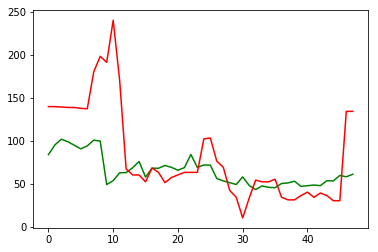

 97%|█████████▋| 33/34 [07:44<00:14, 14.07s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.497	val-gamma-nloglik:114.021	train-sMAPE:1.91186	val-sMAPE:1.95816
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.7171	val-gamma-nloglik:5.30561	train-sMAPE:0.073398	val-sMAPE:0.484778
Stopping. Best iteration:
[91]	train-gamma-nloglik:4.71917	val-gamma-nloglik:5.30025	train-sMAPE:0.087966	val-sMAPE:0.482105



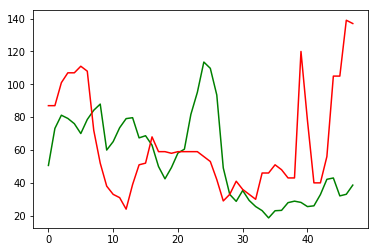

100%|██████████| 34/34 [07:56<00:00, 14.01s/it]


In [195]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i]
    valY = val_data[:, -102+3*i]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst ,xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

  0%|          | 0/34 [00:00<?, ?it/s]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:195.339	val-gamma-nloglik:432.554	train-sMAPE:1.96674	val-sMAPE:1.987
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47273	val-gamma-nloglik:7.35727	train-sMAPE:0.057153	val-sMAPE:0.75357
[200]	train-gamma-nloglik:5.47029	val-gamma-nloglik:7.33796	train-sMAPE:0.019216	val-sMAPE:0.749007
Stopping. Best iteration:
[189]	train-gamma-nloglik:5.47035	val-gamma-nloglik:7.33533	train-sMAPE:0.021057	val-sMAPE:0.747917



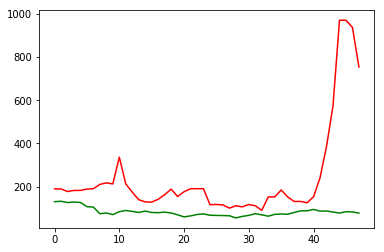

  3%|▎         | 1/34 [00:17<09:53, 18.00s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:249.051	val-gamma-nloglik:598.151	train-sMAPE:1.96991	val-sMAPE:1.98879
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.64646	val-gamma-nloglik:7.4194	train-sMAPE:0.08946	val-sMAPE:0.662527
Stopping. Best iteration:
[101]	train-gamma-nloglik:5.64607	val-gamma-nloglik:7.41492	train-sMAPE:0.086961	val-sMAPE:0.659119



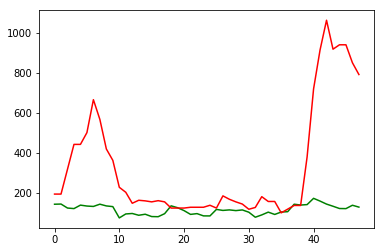

  6%|▌         | 2/34 [00:30<08:14, 15.44s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:253.96	val-gamma-nloglik:477.727	train-sMAPE:1.97088	val-sMAPE:1.98149
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.70579	val-gamma-nloglik:8.09844	train-sMAPE:0.064065	val-sMAPE:0.87673
Stopping. Best iteration:
[103]	train-gamma-nloglik:5.70526	val-gamma-nloglik:8.09625	train-sMAPE:0.059713	val-sMAPE:0.874742



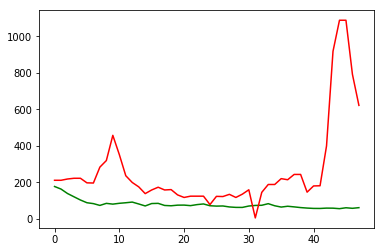

  9%|▉         | 3/34 [00:43<07:31, 14.55s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:251.36	val-gamma-nloglik:447.784	train-sMAPE:1.97241	val-sMAPE:1.98818
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71626	val-gamma-nloglik:7.1075	train-sMAPE:0.064698	val-sMAPE:0.630731
Stopping. Best iteration:
[130]	train-gamma-nloglik:5.7138	val-gamma-nloglik:7.11137	train-sMAPE:0.0375	val-sMAPE:0.628527



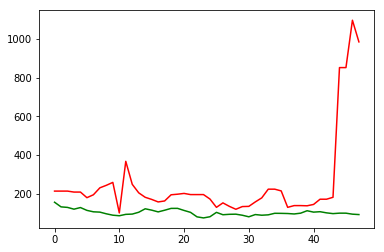

 12%|█▏        | 4/34 [00:58<07:16, 14.55s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:182.939	val-gamma-nloglik:441.859	train-sMAPE:1.95909	val-sMAPE:1.98488
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.33557	val-gamma-nloglik:8.51105	train-sMAPE:0.063066	val-sMAPE:0.840212
Stopping. Best iteration:
[146]	train-gamma-nloglik:5.33324	val-gamma-nloglik:8.4579	train-sMAPE:0.036085	val-sMAPE:0.828907



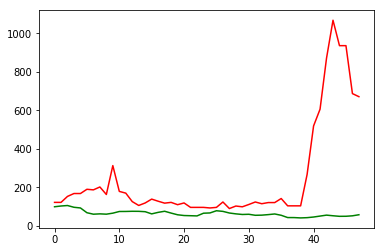

 15%|█▍        | 5/34 [01:14<07:09, 14.82s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:175.505	val-gamma-nloglik:266.646	train-sMAPE:1.95887	val-sMAPE:1.98213
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.31374	val-gamma-nloglik:6.52627	train-sMAPE:0.055823	val-sMAPE:0.683646
Stopping. Best iteration:
[111]	train-gamma-nloglik:5.31281	val-gamma-nloglik:6.52937	train-sMAPE:0.045007	val-sMAPE:0.679154



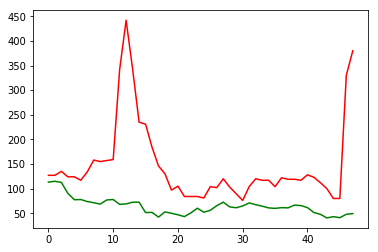

 18%|█▊        | 6/34 [01:27<06:48, 14.58s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:217.205	val-gamma-nloglik:460.331	train-sMAPE:1.96682	val-sMAPE:1.98756
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54793	val-gamma-nloglik:7.76555	train-sMAPE:0.055029	val-sMAPE:0.718288
Stopping. Best iteration:
[146]	train-gamma-nloglik:5.54606	val-gamma-nloglik:7.73915	train-sMAPE:0.02872	val-sMAPE:0.710227



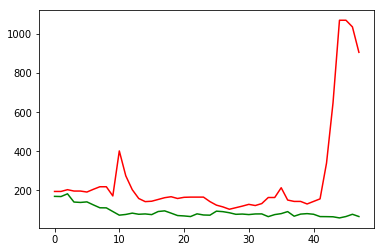

 21%|██        | 7/34 [01:43<06:37, 14.72s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:263.812	val-gamma-nloglik:337.277	train-sMAPE:1.97739	val-sMAPE:1.98583
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.80121	val-gamma-nloglik:6.32774	train-sMAPE:0.065486	val-sMAPE:0.349525
Stopping. Best iteration:
[142]	train-gamma-nloglik:5.79856	val-gamma-nloglik:6.31995	train-sMAPE:0.033135	val-sMAPE:0.343627



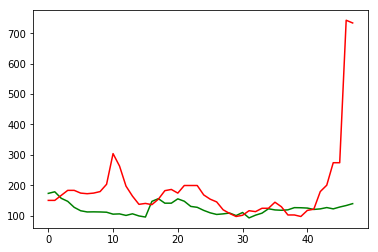

 24%|██▎       | 8/34 [01:58<06:24, 14.77s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:252.269	val-gamma-nloglik:369.472	train-sMAPE:1.97167	val-sMAPE:1.98812
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.7165	val-gamma-nloglik:6.65831	train-sMAPE:0.048708	val-sMAPE:0.619044
Stopping. Best iteration:
[143]	train-gamma-nloglik:5.71495	val-gamma-nloglik:6.64841	train-sMAPE:0.02422	val-sMAPE:0.60766



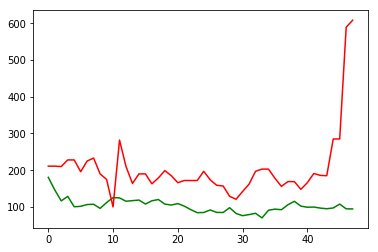

 26%|██▋       | 9/34 [02:13<06:10, 14.82s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:255.356	val-gamma-nloglik:428.102	train-sMAPE:1.97106	val-sMAPE:1.98736
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.68834	val-gamma-nloglik:6.98934	train-sMAPE:0.068148	val-sMAPE:0.563248
[200]	train-gamma-nloglik:5.68391	val-gamma-nloglik:6.97037	train-sMAPE:0.018512	val-sMAPE:0.551164
[300]	train-gamma-nloglik:5.68369	val-gamma-nloglik:6.96803	train-sMAPE:0.008916	val-sMAPE:0.550104
[400]	train-gamma-nloglik:5.68365	val-gamma-nloglik:6.96641	train-sMAPE:0.004948	val-sMAPE:0.548628
Stopping. Best iteration:
[431]	train-gamma-nloglik:5.68364	val-gamma-nloglik:6.96593	train-sMAPE:0.004188	val-sMAPE:0.548489



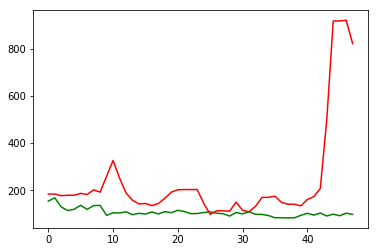

 29%|██▉       | 10/34 [02:45<06:38, 16.59s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:233.325	val-gamma-nloglik:428.89	train-sMAPE:1.97084	val-sMAPE:1.98654
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.64237	val-gamma-nloglik:6.92556	train-sMAPE:0.052722	val-sMAPE:0.456783
Stopping. Best iteration:
[142]	train-gamma-nloglik:5.64068	val-gamma-nloglik:6.90301	train-sMAPE:0.02977	val-sMAPE:0.450035



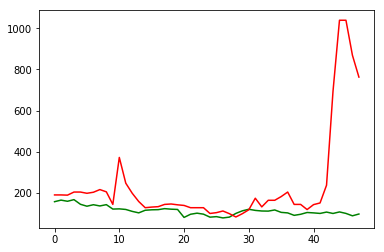

 32%|███▏      | 11/34 [03:01<06:18, 16.48s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:198.263	val-gamma-nloglik:287.724	train-sMAPE:1.96694	val-sMAPE:1.98365
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.48424	val-gamma-nloglik:6.19812	train-sMAPE:0.055414	val-sMAPE:0.387016
Stopping. Best iteration:
[111]	train-gamma-nloglik:5.48346	val-gamma-nloglik:6.19416	train-sMAPE:0.046444	val-sMAPE:0.381595



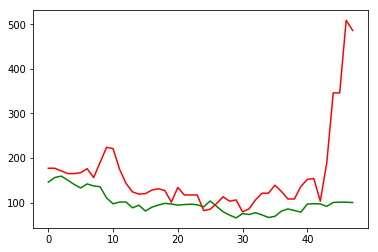

 35%|███▌      | 12/34 [03:14<05:57, 16.23s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:202.896	val-gamma-nloglik:317.174	train-sMAPE:1.96369	val-sMAPE:1.9839
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45779	val-gamma-nloglik:7.71547	train-sMAPE:0.073756	val-sMAPE:1.00158
Stopping. Best iteration:
[128]	train-gamma-nloglik:5.45503	val-gamma-nloglik:7.71181	train-sMAPE:0.047938	val-sMAPE:0.994541



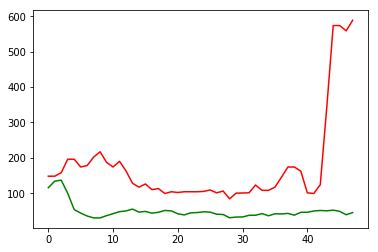

 38%|███▊      | 13/34 [03:29<05:37, 16.09s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:272.758	val-gamma-nloglik:390.467	train-sMAPE:1.96964	val-sMAPE:1.98837
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.73934	val-gamma-nloglik:7.14996	train-sMAPE:0.07639	val-sMAPE:0.808138
Stopping. Best iteration:
[108]	train-gamma-nloglik:5.73785	val-gamma-nloglik:7.13939	train-sMAPE:0.06472	val-sMAPE:0.804404



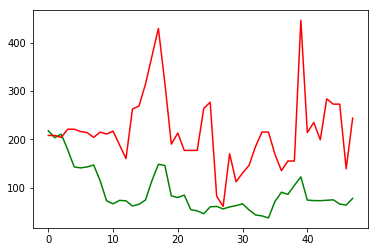

 41%|████      | 14/34 [03:42<05:17, 15.89s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:214.148	val-gamma-nloglik:245.415	train-sMAPE:1.96893	val-sMAPE:1.98255
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54591	val-gamma-nloglik:5.9755	train-sMAPE:0.059196	val-sMAPE:0.367043
Stopping. Best iteration:
[128]	train-gamma-nloglik:5.54411	val-gamma-nloglik:5.9713	train-sMAPE:0.038452	val-sMAPE:0.359172



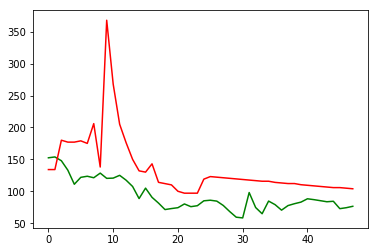

 44%|████▍     | 15/34 [03:56<04:59, 15.79s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:195.242	val-gamma-nloglik:299.311	train-sMAPE:1.96064	val-sMAPE:1.98227
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.39994	val-gamma-nloglik:7.60862	train-sMAPE:0.06154	val-sMAPE:0.920519
Stopping. Best iteration:
[124]	train-gamma-nloglik:5.39816	val-gamma-nloglik:7.5709	train-sMAPE:0.040177	val-sMAPE:0.905677



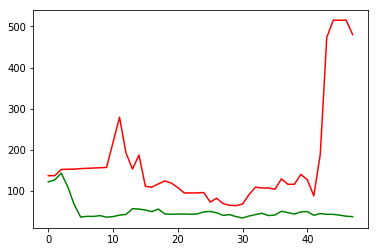

 47%|████▋     | 16/34 [04:10<04:42, 15.69s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:183.589	val-gamma-nloglik:414.204	train-sMAPE:1.95652	val-sMAPE:1.98547
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.2983	val-gamma-nloglik:9.49736	train-sMAPE:0.063502	val-sMAPE:1.13041
Stopping. Best iteration:
[139]	train-gamma-nloglik:5.29598	val-gamma-nloglik:9.49991	train-sMAPE:0.036789	val-sMAPE:1.1258



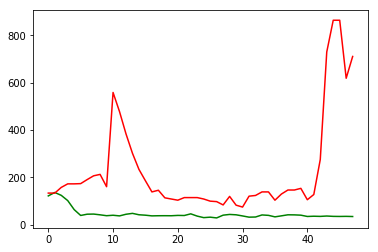

 50%|█████     | 17/34 [04:26<04:26, 15.65s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:262.529	val-gamma-nloglik:384.647	train-sMAPE:1.97647	val-sMAPE:1.98695
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.80842	val-gamma-nloglik:6.65318	train-sMAPE:0.055553	val-sMAPE:0.429038
Stopping. Best iteration:
[139]	train-gamma-nloglik:5.80666	val-gamma-nloglik:6.65263	train-sMAPE:0.03113	val-sMAPE:0.417514



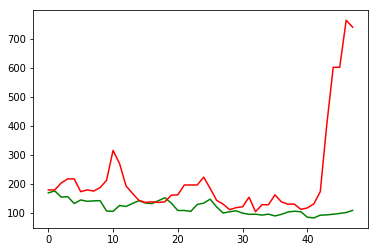

 53%|█████▎    | 18/34 [04:41<04:09, 15.61s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:223.754	val-gamma-nloglik:309.503	train-sMAPE:1.96942	val-sMAPE:1.98278
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.59616	val-gamma-nloglik:6.62027	train-sMAPE:0.062715	val-sMAPE:0.582517
Stopping. Best iteration:
[83]	train-gamma-nloglik:5.60158	val-gamma-nloglik:6.62039	train-sMAPE:0.10244	val-sMAPE:0.573714



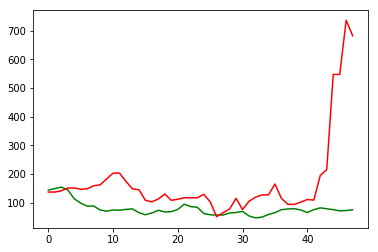

 56%|█████▌    | 19/34 [04:52<03:51, 15.41s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:213.155	val-gamma-nloglik:468.587	train-sMAPE:1.96522	val-sMAPE:1.98527
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.51278	val-gamma-nloglik:7.7853	train-sMAPE:0.071243	val-sMAPE:0.729118
Stopping. Best iteration:
[138]	train-gamma-nloglik:5.50963	val-gamma-nloglik:7.73673	train-sMAPE:0.041922	val-sMAPE:0.715979



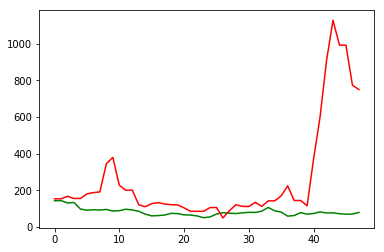

 59%|█████▉    | 20/34 [05:07<03:35, 15.39s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:171.863	val-gamma-nloglik:241.321	train-sMAPE:1.9623	val-sMAPE:1.98076
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.32044	val-gamma-nloglik:6.41812	train-sMAPE:0.055499	val-sMAPE:0.739039
[200]	train-gamma-nloglik:5.31815	val-gamma-nloglik:6.41445	train-sMAPE:0.019642	val-sMAPE:0.735467
Stopping. Best iteration:
[154]	train-gamma-nloglik:5.31853	val-gamma-nloglik:6.40925	train-sMAPE:0.029124	val-sMAPE:0.732564



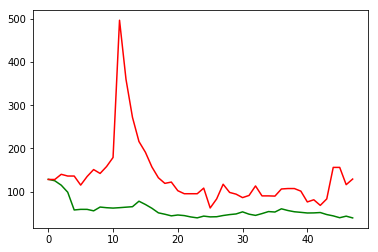

 62%|██████▏   | 21/34 [05:23<03:20, 15.41s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:231.484	val-gamma-nloglik:400.995	train-sMAPE:1.96919	val-sMAPE:1.98557
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.63456	val-gamma-nloglik:7.03388	train-sMAPE:0.059978	val-sMAPE:0.593896
Stopping. Best iteration:
[134]	train-gamma-nloglik:5.63243	val-gamma-nloglik:7.01824	train-sMAPE:0.032963	val-sMAPE:0.581525



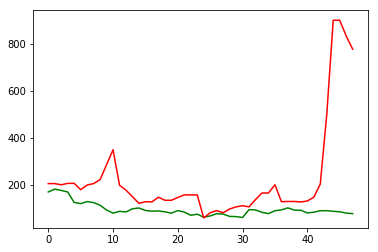

 65%|██████▍   | 22/34 [05:38<03:04, 15.39s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:213.279	val-gamma-nloglik:316.728	train-sMAPE:1.96613	val-sMAPE:1.98453
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.51495	val-gamma-nloglik:6.8204	train-sMAPE:0.06327	val-sMAPE:0.741328
[200]	train-gamma-nloglik:5.5118	val-gamma-nloglik:6.79995	train-sMAPE:0.022861	val-sMAPE:0.720113
[300]	train-gamma-nloglik:5.51148	val-gamma-nloglik:6.79925	train-sMAPE:0.011725	val-sMAPE:0.718519
[400]	train-gamma-nloglik:5.5114	val-gamma-nloglik:6.79829	train-sMAPE:0.006523	val-sMAPE:0.717514
Stopping. Best iteration:
[433]	train-gamma-nloglik:5.5114	val-gamma-nloglik:6.79757	train-sMAPE:0.005451	val-sMAPE:0.717281



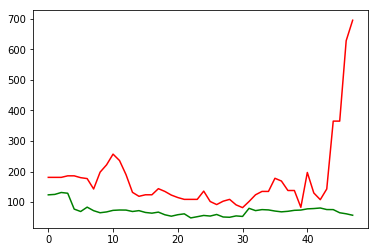

 68%|██████▊   | 23/34 [06:11<02:57, 16.16s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:207.646	val-gamma-nloglik:330.222	train-sMAPE:1.97012	val-sMAPE:1.9813
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54303	val-gamma-nloglik:6.80494	train-sMAPE:0.06426	val-sMAPE:0.451552
Stopping. Best iteration:
[145]	train-gamma-nloglik:5.54055	val-gamma-nloglik:6.76869	train-sMAPE:0.034514	val-sMAPE:0.444863



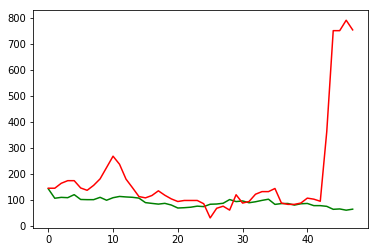

 71%|███████   | 24/34 [06:27<02:41, 16.13s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:250.122	val-gamma-nloglik:347.97	train-sMAPE:1.97096	val-sMAPE:1.98483
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.69947	val-gamma-nloglik:6.72163	train-sMAPE:0.056908	val-sMAPE:0.697639
[200]	train-gamma-nloglik:5.69693	val-gamma-nloglik:6.69893	train-sMAPE:0.016633	val-sMAPE:0.684057
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.69687	val-gamma-nloglik:6.69668	train-sMAPE:0.014585	val-sMAPE:0.682884



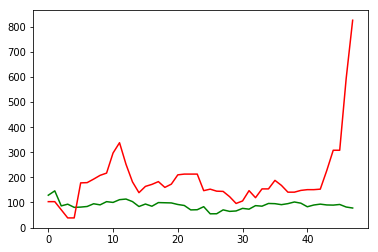

 74%|███████▎  | 25/34 [06:47<02:26, 16.28s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:218.09	val-gamma-nloglik:416.486	train-sMAPE:1.96879	val-sMAPE:1.98706
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.57421	val-gamma-nloglik:7.15061	train-sMAPE:0.059338	val-sMAPE:0.662009
Stopping. Best iteration:
[132]	train-gamma-nloglik:5.57249	val-gamma-nloglik:7.14165	train-sMAPE:0.037572	val-sMAPE:0.658568



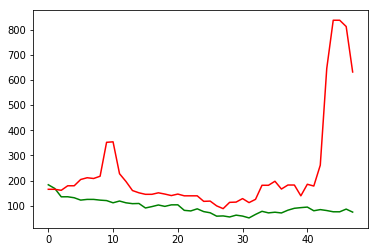

 76%|███████▋  | 26/34 [07:01<02:09, 16.22s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:250.629	val-gamma-nloglik:456.79	train-sMAPE:1.9742	val-sMAPE:1.98813
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.72312	val-gamma-nloglik:7.13638	train-sMAPE:0.074755	val-sMAPE:0.535164
[200]	train-gamma-nloglik:5.71906	val-gamma-nloglik:7.12531	train-sMAPE:0.026159	val-sMAPE:0.523265
Stopping. Best iteration:
[161]	train-gamma-nloglik:5.71955	val-gamma-nloglik:7.12407	train-sMAPE:0.035998	val-sMAPE:0.521423



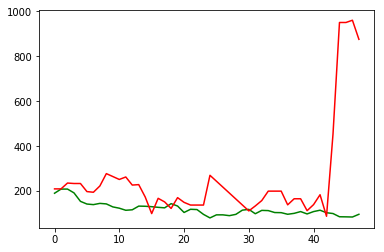

 79%|███████▉  | 27/34 [07:18<01:53, 16.22s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:229.332	val-gamma-nloglik:414.302	train-sMAPE:1.97253	val-sMAPE:1.98629
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.64426	val-gamma-nloglik:6.97682	train-sMAPE:0.051261	val-sMAPE:0.524294
Stopping. Best iteration:
[126]	train-gamma-nloglik:5.64306	val-gamma-nloglik:6.97015	train-sMAPE:0.034666	val-sMAPE:0.522252



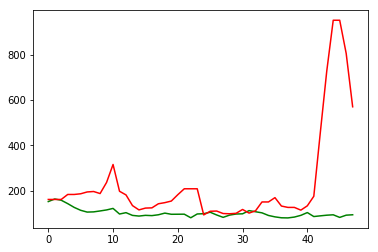

 82%|████████▏ | 28/34 [07:32<01:36, 16.15s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:220.891	val-gamma-nloglik:510.227	train-sMAPE:1.96833	val-sMAPE:1.98705
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.56938	val-gamma-nloglik:7.91437	train-sMAPE:0.068066	val-sMAPE:0.773976
Stopping. Best iteration:
[139]	train-gamma-nloglik:5.56646	val-gamma-nloglik:7.90032	train-sMAPE:0.034014	val-sMAPE:0.759887



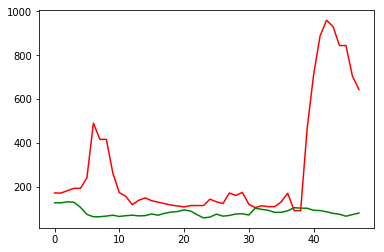

 85%|████████▌ | 29/34 [07:47<01:20, 16.11s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:192.015	val-gamma-nloglik:281.112	train-sMAPE:1.96703	val-sMAPE:1.98306
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46016	val-gamma-nloglik:6.36495	train-sMAPE:0.048738	val-sMAPE:0.472282
[200]	train-gamma-nloglik:5.45838	val-gamma-nloglik:6.35872	train-sMAPE:0.017411	val-sMAPE:0.466652
Stopping. Best iteration:
[185]	train-gamma-nloglik:5.45845	val-gamma-nloglik:6.35801	train-sMAPE:0.019572	val-sMAPE:0.465698



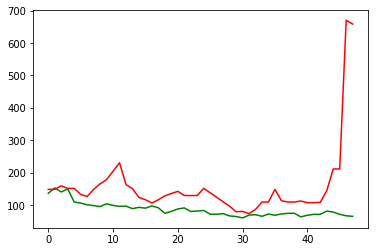

 88%|████████▊ | 30/34 [08:05<01:04, 16.17s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:224.769	val-gamma-nloglik:379.896	train-sMAPE:1.97181	val-sMAPE:1.98491
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62595	val-gamma-nloglik:7.46326	train-sMAPE:0.05981	val-sMAPE:0.765715
[200]	train-gamma-nloglik:5.62329	val-gamma-nloglik:7.43985	train-sMAPE:0.019292	val-sMAPE:0.760866
Stopping. Best iteration:
[155]	train-gamma-nloglik:5.62363	val-gamma-nloglik:7.4352	train-sMAPE:0.028	val-sMAPE:0.758524



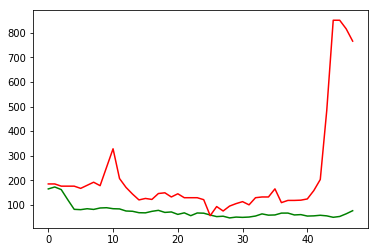

 91%|█████████ | 31/34 [08:21<00:48, 16.17s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:229.621	val-gamma-nloglik:283.292	train-sMAPE:1.97299	val-sMAPE:1.98462
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.64397	val-gamma-nloglik:6.30692	train-sMAPE:0.054725	val-sMAPE:0.534364
Stopping. Best iteration:
[117]	train-gamma-nloglik:5.64278	val-gamma-nloglik:6.29857	train-sMAPE:0.039506	val-sMAPE:0.525619



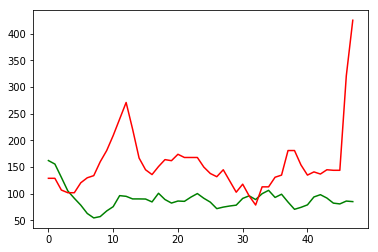

 94%|█████████▍| 32/34 [08:35<00:32, 16.11s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:229.777	val-gamma-nloglik:351.555	train-sMAPE:1.97282	val-sMAPE:1.98673
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.6475	val-gamma-nloglik:6.62988	train-sMAPE:0.064399	val-sMAPE:0.588581
Stopping. Best iteration:
[113]	train-gamma-nloglik:5.64622	val-gamma-nloglik:6.62716	train-sMAPE:0.051281	val-sMAPE:0.586488



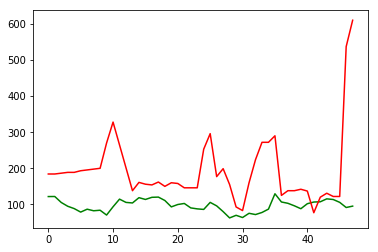

 97%|█████████▋| 33/34 [08:48<00:16, 16.03s/it]

(960, 12330)
(48, 12330)
[0]	train-gamma-nloglik:187.193	val-gamma-nloglik:290.177	train-sMAPE:1.96508	val-sMAPE:1.98462
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.40813	val-gamma-nloglik:6.46908	train-sMAPE:0.055983	val-sMAPE:0.612006
Stopping. Best iteration:
[104]	train-gamma-nloglik:5.40776	val-gamma-nloglik:6.46864	train-sMAPE:0.051987	val-sMAPE:0.60962



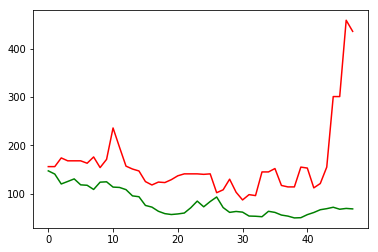

100%|██████████| 34/34 [09:01<00:00, 15.94s/it]


In [196]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i+1]
    valY = val_data[:, -102+3*i+1]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# O3 小维度

  0%|          | 0/34 [00:00<?, ?it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:162.177	val-gamma-nloglik:148.974	train-sMAPE:1.87513	val-sMAPE:1.9066
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.28532	val-gamma-nloglik:5.22013	train-sMAPE:0.533008	val-sMAPE:0.395252
Stopping. Best iteration:
[103]	train-gamma-nloglik:5.28344	val-gamma-nloglik:5.21799	train-sMAPE:0.532076	val-sMAPE:0.391697



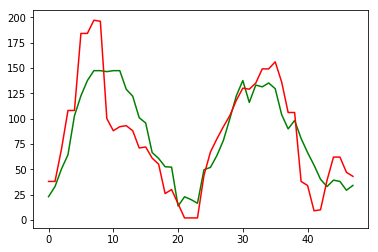

  3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:148.14	val-gamma-nloglik:112.17	train-sMAPE:1.8968	val-sMAPE:1.9343
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19077	val-gamma-nloglik:5.101	train-sMAPE:0.531344	val-sMAPE:0.38883
Stopping. Best iteration:
[61]	train-gamma-nloglik:5.28062	val-gamma-nloglik:5.06123	train-sMAPE:0.597761	val-sMAPE:0.304245



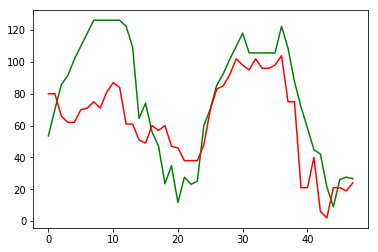

  6%|▌         | 2/34 [00:01<00:22,  1.40it/s]

(960, 4)
(48, 4)
8.0
[0]	train-gamma-nloglik:148.819	val-gamma-nloglik:132.913	train-sMAPE:1.85559	val-sMAPE:1.94306
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.15549	val-gamma-nloglik:5.15466	train-sMAPE:0.590557	val-sMAPE:0.331713
Stopping. Best iteration:
[95]	train-gamma-nloglik:5.16061	val-gamma-nloglik:5.154	train-sMAPE:0.594218	val-sMAPE:0.331029



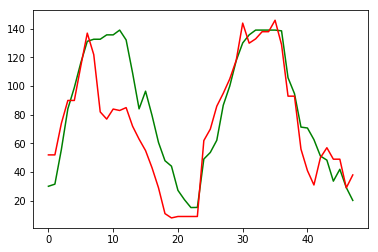

  9%|▉         | 3/34 [00:02<00:22,  1.39it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:155.231	val-gamma-nloglik:148.104	train-sMAPE:1.89067	val-sMAPE:1.8539
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.26227	val-gamma-nloglik:5.17987	train-sMAPE:0.547314	val-sMAPE:0.480826
Stopping. Best iteration:
[119]	train-gamma-nloglik:5.24872	val-gamma-nloglik:5.171	train-sMAPE:0.533562	val-sMAPE:0.47226



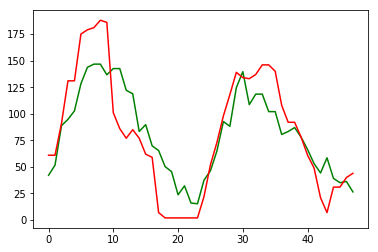

 12%|█▏        | 4/34 [00:02<00:22,  1.34it/s]

(960, 4)
(48, 4)
36.0
[0]	train-gamma-nloglik:170.257	val-gamma-nloglik:152.33	train-sMAPE:1.96862	val-sMAPE:1.96989
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47569	val-gamma-nloglik:5.40529	train-sMAPE:0.307431	val-sMAPE:0.23181
Stopping. Best iteration:
[76]	train-gamma-nloglik:5.48459	val-gamma-nloglik:5.40034	train-sMAPE:0.316843	val-sMAPE:0.216486



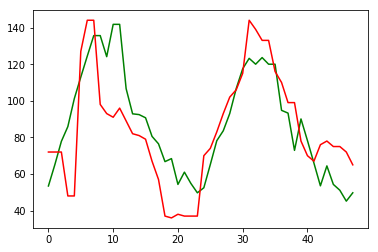

 15%|█▍        | 5/34 [00:03<00:21,  1.34it/s]

(960, 4)
(48, 4)
50.0
[0]	train-gamma-nloglik:197.086	val-gamma-nloglik:191.433	train-sMAPE:1.96921	val-sMAPE:1.97628
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.63074	val-gamma-nloglik:5.61932	train-sMAPE:0.329922	val-sMAPE:0.194669
Stopping. Best iteration:
[82]	train-gamma-nloglik:5.63749	val-gamma-nloglik:5.61936	train-sMAPE:0.342388	val-sMAPE:0.183473



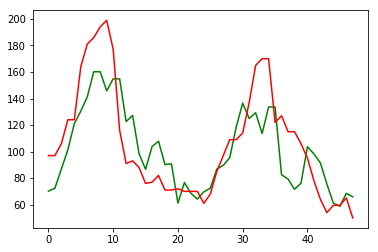

 18%|█▊        | 6/34 [00:04<00:20,  1.36it/s]

(960, 4)
(48, 4)
7.0
[0]	train-gamma-nloglik:171.197	val-gamma-nloglik:151.575	train-sMAPE:1.9283	val-sMAPE:1.94834
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.39838	val-gamma-nloglik:5.28344	train-sMAPE:0.409269	val-sMAPE:0.332871
Stopping. Best iteration:
[118]	train-gamma-nloglik:5.39223	val-gamma-nloglik:5.28066	train-sMAPE:0.401584	val-sMAPE:0.329969



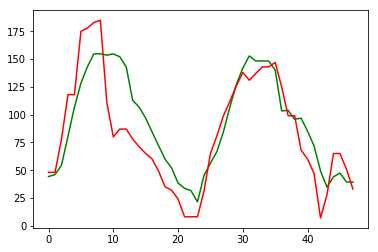

 21%|██        | 7/34 [00:05<00:20,  1.31it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:116.414	val-gamma-nloglik:127.448	train-sMAPE:1.78331	val-sMAPE:1.74207
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.78673	val-gamma-nloglik:4.68759	train-sMAPE:0.648353	val-sMAPE:0.658817
[200]	train-gamma-nloglik:4.71705	val-gamma-nloglik:4.63932	train-sMAPE:0.586441	val-sMAPE:0.607207
[300]	train-gamma-nloglik:4.67861	val-gamma-nloglik:4.62219	train-sMAPE:0.555075	val-sMAPE:0.569639
[400]	train-gamma-nloglik:4.65299	val-gamma-nloglik:4.62339	train-sMAPE:0.528748	val-sMAPE:0.545042
[500]	train-gamma-nloglik:4.63032	val-gamma-nloglik:4.61608	train-sMAPE:0.506491	val-sMAPE:0.522876
[599]	train-gamma-nloglik:4.61037	val-gamma-nloglik:4.61101	train-sMAPE:0.484447	val-sMAPE:0.504648


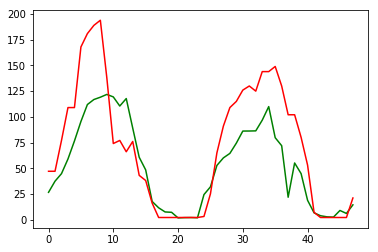

 24%|██▎       | 8/34 [00:08<00:26,  1.00s/it]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:175.724	val-gamma-nloglik:152.882	train-sMAPE:1.92125	val-sMAPE:1.84664
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.38809	val-gamma-nloglik:5.1129	train-sMAPE:0.442008	val-sMAPE:0.550476
[200]	train-gamma-nloglik:5.35411	val-gamma-nloglik:5.09839	train-sMAPE:0.401299	val-sMAPE:0.535294
Stopping. Best iteration:
[184]	train-gamma-nloglik:5.35865	val-gamma-nloglik:5.09846	train-sMAPE:0.407222	val-sMAPE:0.531899



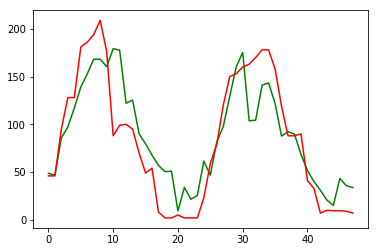

 26%|██▋       | 9/34 [00:09<00:26,  1.05s/it]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:161.19	val-gamma-nloglik:144.217	train-sMAPE:1.89997	val-sMAPE:1.85386
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.3062	val-gamma-nloglik:5.13465	train-sMAPE:0.479371	val-sMAPE:0.483153
Stopping. Best iteration:
[92]	train-gamma-nloglik:5.31015	val-gamma-nloglik:5.13491	train-sMAPE:0.483529	val-sMAPE:0.479723



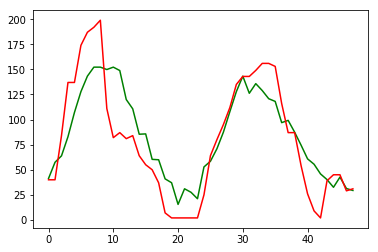

 29%|██▉       | 10/34 [00:10<00:24,  1.02s/it]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:175.432	val-gamma-nloglik:147.65	train-sMAPE:1.92168	val-sMAPE:1.89252
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.41803	val-gamma-nloglik:5.2237	train-sMAPE:0.44779	val-sMAPE:0.486873
Stopping. Best iteration:
[95]	train-gamma-nloglik:5.42089	val-gamma-nloglik:5.22221	train-sMAPE:0.450709	val-sMAPE:0.484274



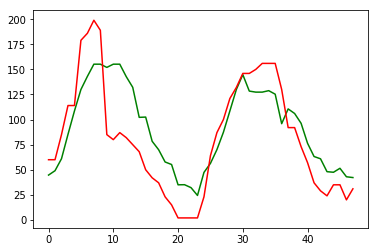

 32%|███▏      | 11/34 [00:10<00:22,  1.01it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:155.575	val-gamma-nloglik:141.85	train-sMAPE:1.89332	val-sMAPE:1.90219
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.26605	val-gamma-nloglik:5.1654	train-sMAPE:0.50813	val-sMAPE:0.408239
Stopping. Best iteration:
[93]	train-gamma-nloglik:5.26926	val-gamma-nloglik:5.16737	train-sMAPE:0.511847	val-sMAPE:0.406894



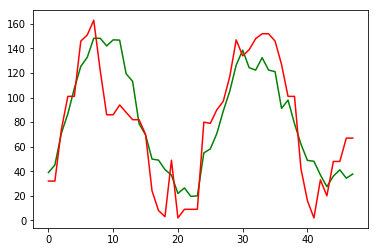

 35%|███▌      | 12/34 [00:11<00:21,  1.03it/s]

(960, 4)
(48, 4)
52.0
[0]	train-gamma-nloglik:181.637	val-gamma-nloglik:171.185	train-sMAPE:1.97017	val-sMAPE:1.97399
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.53868	val-gamma-nloglik:5.50427	train-sMAPE:0.303949	val-sMAPE:0.122223
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.54529	val-gamma-nloglik:5.50308	train-sMAPE:0.312215	val-sMAPE:0.115372



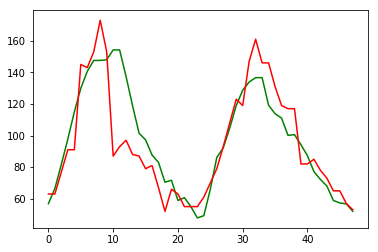

 38%|███▊      | 13/34 [00:12<00:19,  1.06it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:159.445	val-gamma-nloglik:152.105	train-sMAPE:1.92507	val-sMAPE:1.91705
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.29789	val-gamma-nloglik:5.18645	train-sMAPE:0.439824	val-sMAPE:0.411877
[200]	train-gamma-nloglik:5.26879	val-gamma-nloglik:5.18116	train-sMAPE:0.403908	val-sMAPE:0.40223
Stopping. Best iteration:
[161]	train-gamma-nloglik:5.27898	val-gamma-nloglik:5.18177	train-sMAPE:0.416161	val-sMAPE:0.401537



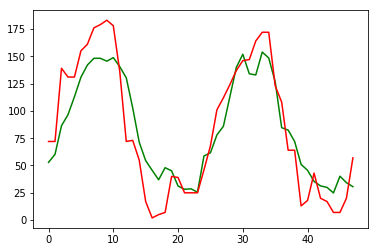

 41%|████      | 14/34 [00:13<00:18,  1.05it/s]

(960, 4)
(48, 4)
26.40909090909091
[0]	train-gamma-nloglik:178.576	val-gamma-nloglik:140.54	train-sMAPE:1.963	val-sMAPE:1.9649
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.50247	val-gamma-nloglik:5.31723	train-sMAPE:0.350002	val-sMAPE:0.339224
Stopping. Best iteration:
[62]	train-gamma-nloglik:5.56778	val-gamma-nloglik:5.31133	train-sMAPE:0.430169	val-sMAPE:0.28019



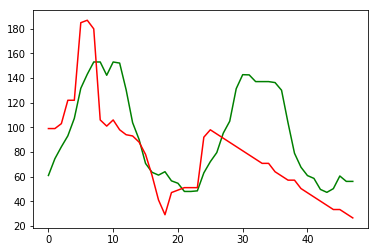

 44%|████▍     | 15/34 [00:13<00:17,  1.08it/s]

(960, 4)
(48, 4)
18.0
[0]	train-gamma-nloglik:192.115	val-gamma-nloglik:181.025	train-sMAPE:1.94964	val-sMAPE:1.9672
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54926	val-gamma-nloglik:5.50454	train-sMAPE:0.425707	val-sMAPE:0.278189
Stopping. Best iteration:
[84]	train-gamma-nloglik:5.55606	val-gamma-nloglik:5.50295	train-sMAPE:0.433391	val-sMAPE:0.274384



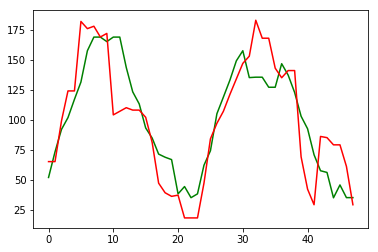

 47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

(960, 4)
(48, 4)
61.0
[0]	train-gamma-nloglik:225.833	val-gamma-nloglik:208.168	train-sMAPE:1.97836	val-sMAPE:1.97894
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.77904	val-gamma-nloglik:5.71609	train-sMAPE:0.269256	val-sMAPE:0.159042
Stopping. Best iteration:
[75]	train-gamma-nloglik:5.79082	val-gamma-nloglik:5.71067	train-sMAPE:0.279758	val-sMAPE:0.129068



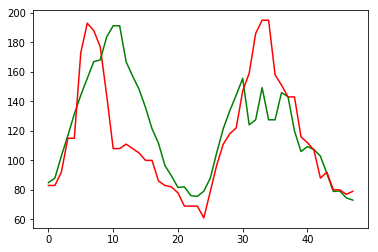

 50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:101.745	val-gamma-nloglik:96.1891	train-sMAPE:1.85765	val-sMAPE:1.8534
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.81262	val-gamma-nloglik:4.70403	train-sMAPE:0.518308	val-sMAPE:0.435771
[200]	train-gamma-nloglik:4.77393	val-gamma-nloglik:4.70019	train-sMAPE:0.47281	val-sMAPE:0.426346
Stopping. Best iteration:
[165]	train-gamma-nloglik:4.78569	val-gamma-nloglik:4.69637	train-sMAPE:0.486479	val-sMAPE:0.421293



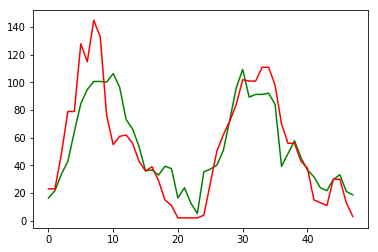

 53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:148.888	val-gamma-nloglik:142.19	train-sMAPE:1.88003	val-sMAPE:1.90425
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21947	val-gamma-nloglik:5.18987	train-sMAPE:0.505618	val-sMAPE:0.379017
Stopping. Best iteration:
[113]	train-gamma-nloglik:5.2134	val-gamma-nloglik:5.18518	train-sMAPE:0.499655	val-sMAPE:0.375909



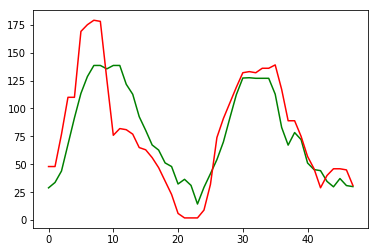

 56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

(960, 4)
(48, 4)
15.0
[0]	train-gamma-nloglik:177.201	val-gamma-nloglik:156.098	train-sMAPE:1.95588	val-sMAPE:1.96488
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47596	val-gamma-nloglik:5.43672	train-sMAPE:0.364886	val-sMAPE:0.269805
Stopping. Best iteration:
[81]	train-gamma-nloglik:5.48337	val-gamma-nloglik:5.42731	train-sMAPE:0.374652	val-sMAPE:0.265937



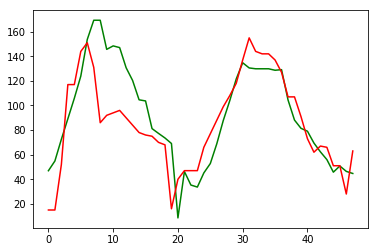

 59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

(960, 4)
(48, 4)
13.0
[0]	train-gamma-nloglik:207.043	val-gamma-nloglik:218.02	train-sMAPE:1.96946	val-sMAPE:1.97377
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66416	val-gamma-nloglik:5.71499	train-sMAPE:0.352333	val-sMAPE:0.275506
Stopping. Best iteration:
[85]	train-gamma-nloglik:5.66953	val-gamma-nloglik:5.71324	train-sMAPE:0.360921	val-sMAPE:0.266168



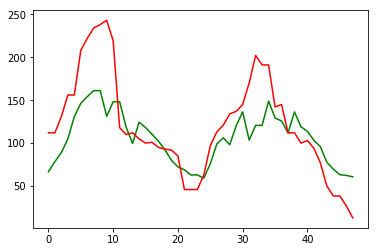

 62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

(960, 4)
(48, 4)
5.0
[0]	train-gamma-nloglik:143.145	val-gamma-nloglik:143.815	train-sMAPE:1.90313	val-sMAPE:1.93976
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.16721	val-gamma-nloglik:5.1801	train-sMAPE:0.451849	val-sMAPE:0.294924
Stopping. Best iteration:
[101]	train-gamma-nloglik:5.16657	val-gamma-nloglik:5.1794	train-sMAPE:0.451216	val-sMAPE:0.294276



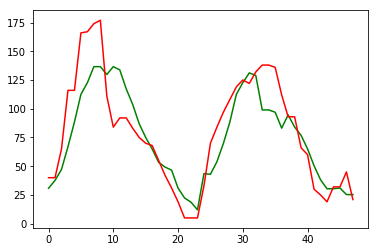

 65%|██████▍   | 22/34 [00:19<00:10,  1.14it/s]

(960, 4)
(48, 4)
13.0
[0]	train-gamma-nloglik:179.621	val-gamma-nloglik:164.698	train-sMAPE:1.94085	val-sMAPE:1.9613
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47633	val-gamma-nloglik:5.38549	train-sMAPE:0.408183	val-sMAPE:0.290774
Stopping. Best iteration:
[97]	train-gamma-nloglik:5.47726	val-gamma-nloglik:5.38508	train-sMAPE:0.40984	val-sMAPE:0.286533



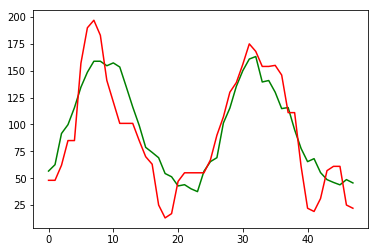

 68%|██████▊   | 23/34 [00:20<00:09,  1.15it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:142.121	val-gamma-nloglik:141.553	train-sMAPE:1.89674	val-sMAPE:1.90617
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.15837	val-gamma-nloglik:5.15466	train-sMAPE:0.47735	val-sMAPE:0.399151
Stopping. Best iteration:
[106]	train-gamma-nloglik:5.15515	val-gamma-nloglik:5.15006	train-sMAPE:0.474177	val-sMAPE:0.395734



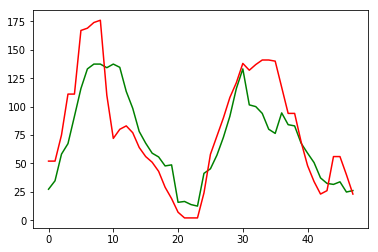

 71%|███████   | 24/34 [00:20<00:08,  1.15it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:160.008	val-gamma-nloglik:150.326	train-sMAPE:1.91167	val-sMAPE:1.86794
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.28272	val-gamma-nloglik:5.15523	train-sMAPE:0.463894	val-sMAPE:0.491673
Stopping. Best iteration:
[143]	train-gamma-nloglik:5.26811	val-gamma-nloglik:5.15123	train-sMAPE:0.442787	val-sMAPE:0.486894



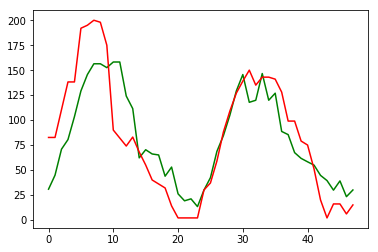

 74%|███████▎  | 25/34 [00:21<00:07,  1.15it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:157.193	val-gamma-nloglik:139.317	train-sMAPE:1.89233	val-sMAPE:1.85305
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.24898	val-gamma-nloglik:5.10452	train-sMAPE:0.504476	val-sMAPE:0.511859
Stopping. Best iteration:
[98]	train-gamma-nloglik:5.24952	val-gamma-nloglik:5.10142	train-sMAPE:0.505684	val-sMAPE:0.504723



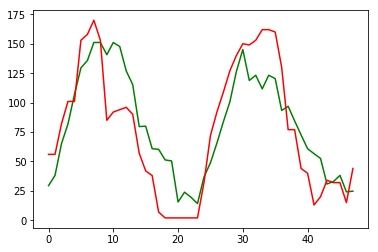

 76%|███████▋  | 26/34 [00:22<00:06,  1.15it/s]

(960, 4)
(48, 4)
5.0
[0]	train-gamma-nloglik:151.974	val-gamma-nloglik:138.15	train-sMAPE:1.91306	val-sMAPE:1.93331
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.26387	val-gamma-nloglik:5.14353	train-sMAPE:0.4296	val-sMAPE:0.354
Stopping. Best iteration:
[95]	train-gamma-nloglik:5.26556	val-gamma-nloglik:5.14381	train-sMAPE:0.432267	val-sMAPE:0.351571



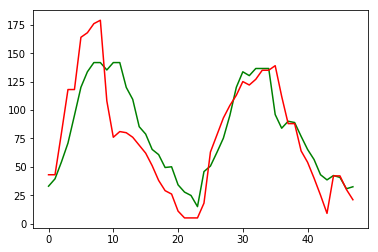

 79%|███████▉  | 27/34 [00:23<00:06,  1.15it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:128.839	val-gamma-nloglik:111.451	train-sMAPE:1.87879	val-sMAPE:1.87338
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.09117	val-gamma-nloglik:4.90591	train-sMAPE:0.520615	val-sMAPE:0.488815
[200]	train-gamma-nloglik:5.05058	val-gamma-nloglik:4.89614	train-sMAPE:0.479864	val-sMAPE:0.483634
[300]	train-gamma-nloglik:5.02666	val-gamma-nloglik:4.87691	train-sMAPE:0.453992	val-sMAPE:0.46763
[400]	train-gamma-nloglik:5.0076	val-gamma-nloglik:4.86588	train-sMAPE:0.432765	val-sMAPE:0.456971
[500]	train-gamma-nloglik:4.99127	val-gamma-nloglik:4.85788	train-sMAPE:0.412808	val-sMAPE:0.442606
[599]	train-gamma-nloglik:4.97813	val-gamma-nloglik:4.85512	train-sMAPE:0.39661	val-sMAPE:0.43521


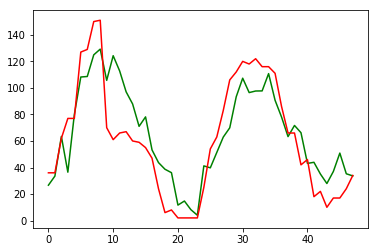

 82%|████████▏ | 28/34 [00:26<00:05,  1.07it/s]

(960, 4)
(48, 4)
12.0
[0]	train-gamma-nloglik:176.942	val-gamma-nloglik:138.37	train-sMAPE:1.92076	val-sMAPE:1.95832
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46562	val-gamma-nloglik:5.27378	train-sMAPE:0.459573	val-sMAPE:0.347669
Stopping. Best iteration:
[65]	train-gamma-nloglik:5.5154	val-gamma-nloglik:5.25798	train-sMAPE:0.512897	val-sMAPE:0.303367



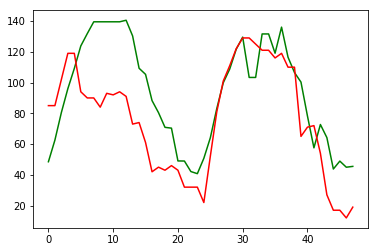

 85%|████████▌ | 29/34 [00:26<00:04,  1.09it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:163.583	val-gamma-nloglik:149.231	train-sMAPE:1.90458	val-sMAPE:1.85074
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.32518	val-gamma-nloglik:5.14613	train-sMAPE:0.462592	val-sMAPE:0.501809
Stopping. Best iteration:
[124]	train-gamma-nloglik:5.31707	val-gamma-nloglik:5.14384	train-sMAPE:0.453998	val-sMAPE:0.497109



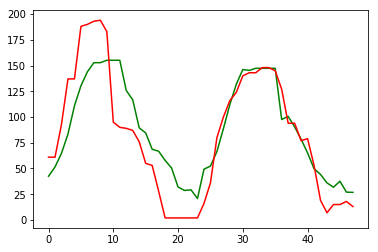

 88%|████████▊ | 30/34 [00:27<00:03,  1.09it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:143.909	val-gamma-nloglik:121.964	train-sMAPE:1.86376	val-sMAPE:1.81498
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.12862	val-gamma-nloglik:4.90409	train-sMAPE:0.544213	val-sMAPE:0.560348
Stopping. Best iteration:
[82]	train-gamma-nloglik:5.14522	val-gamma-nloglik:4.90893	train-sMAPE:0.564019	val-sMAPE:0.554137



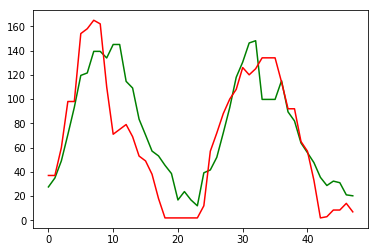

 91%|█████████ | 31/34 [00:28<00:02,  1.10it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:156.123	val-gamma-nloglik:160.859	train-sMAPE:1.8618	val-sMAPE:1.89466
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21089	val-gamma-nloglik:5.31999	train-sMAPE:0.562086	val-sMAPE:0.470694
Stopping. Best iteration:
[104]	train-gamma-nloglik:5.20742	val-gamma-nloglik:5.31904	train-sMAPE:0.558162	val-sMAPE:0.46924



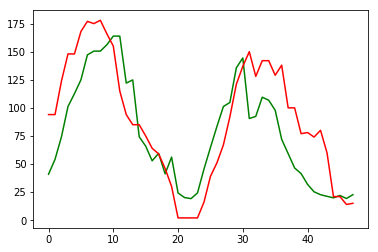

 94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

(960, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:164.551	val-gamma-nloglik:203.314	train-sMAPE:1.9263	val-sMAPE:1.93917
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36002	val-gamma-nloglik:5.58257	train-sMAPE:0.419519	val-sMAPE:0.475314
Stopping. Best iteration:
[97]	train-gamma-nloglik:5.36141	val-gamma-nloglik:5.57994	train-sMAPE:0.421687	val-sMAPE:0.47173



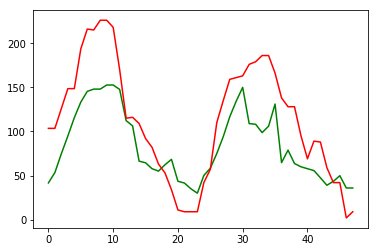

 97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

(960, 4)
(48, 4)
28.0
[0]	train-gamma-nloglik:173.749	val-gamma-nloglik:144.482	train-sMAPE:1.95718	val-sMAPE:1.96497
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.44609	val-gamma-nloglik:5.29451	train-sMAPE:0.372274	val-sMAPE:0.214561
[200]	train-gamma-nloglik:5.42737	val-gamma-nloglik:5.28994	train-sMAPE:0.333792	val-sMAPE:0.201416
Stopping. Best iteration:
[177]	train-gamma-nloglik:5.43025	val-gamma-nloglik:5.28842	train-sMAPE:0.339067	val-sMAPE:0.194459



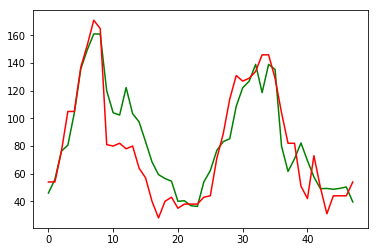

100%|██████████| 34/34 [00:30<00:00,  1.11it/s]


In [197]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,68+6*i+4:68+6*i+5],train_data[:,-115:-114],train_data[:,-110:-109],train_data[:,-104:-103]),axis = 1)
    valX = np.concatenate((val_data[:,68+6*i+4:68+6*i+5],val_data[:,-115:-114],val_data[:,-110:-109],val_data[:,-104:-103]),axis = 1)
    trainY = train_data[:, -102+3*i+2]
    valY = val_data[:, -102+3*i+2]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)
    print(min(valY))
    
    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# O3大维度


  0%|          | 0/34 [00:00<?, ?it/s]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:162.065	val-gamma-nloglik:176.112	train-sMAPE:1.88353	val-sMAPE:1.82294
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71369	val-gamma-nloglik:6.13154	train-sMAPE:0.82028	val-sMAPE:1.10504



Exception in thread Thread-364:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[200]	train-gamma-nloglik:5.04652	val-gamma-nloglik:5.29275	train-sMAPE:0.239828	val-sMAPE:0.744212
[300]	train-gamma-nloglik:5.00669	val-gamma-nloglik:5.25665	train-sMAPE:0.144661	val-sMAPE:0.716031
[400]	train-gamma-nloglik:4.99102	val-gamma-nloglik:5.24288	train-sMAPE:0.096942	val-sMAPE:0.706811
Stopping. Best iteration:
[444]	train-gamma-nloglik:4.98702	val-gamma-nloglik:5.24139	train-sMAPE:0.083588	val-sMAPE:0.704989



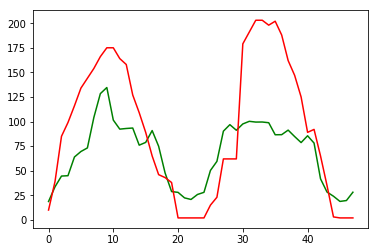

  3%|▎         | 1/34 [00:25<13:53, 25.27s/it]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:142.235	val-gamma-nloglik:177.35	train-sMAPE:1.89234	val-sMAPE:1.89804
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.44687	val-gamma-nloglik:6.25054	train-sMAPE:0.71935	val-sMAPE:1.01396


KeyboardInterrupt: 

In [331]:
# for i in tqdm(range(34)):
#     trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-116],train_data[:,-115:-102]),axis = 1)
#     valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-116],val_data[:,-115:-102]),axis = 1)
#     trainY = train_data[:, -102+3*i+2]
#     valY = val_data[:, -102+3*i+2]
# #     trainY = beijing_train[:, -105+3*i]
# #     valY = beijing_test[:, -105+3*i]
#     print(trainX.shape)
#     print(valX.shape)
#     print(min(valY))
    
#     params={
#     'booster':'gbtree',
#     'objective': 'reg:gamma', #多分类的问题
#     # 'num_class':2, # 类别数，与 multisoftmax 并用
#     'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
#     'max_depth':2, # 构建树的深度，越大越容易过拟合
#     'lambda':1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#     'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
#     'subsample':0.8, # 随机采样训练样本
#     'colsample_bytree':1, # 生成树时进行的列采样
#     'min_child_weight':1, 
#     # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#     #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#     #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
#     'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
#     'eta': 0.05, # 如同学习率
#     'seed':1000,
#     'nthread':-1,# cpu 线程数
# #     'eval_metric':['mae','rmse']
#     }

#     plst = list(params.items())
#     num_rounds = 600 # 迭代次数
#     xgb_train = xgb.DMatrix(trainX, label= trainY)
#     xgb_val = xgb.DMatrix(valX, label= valY)
#     watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
#     #训练模型并保存
#     # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
#     model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
#     plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
#     plt.plot(valY,'r')
#     plt.show()
#     model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# London

In [198]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
# train_data, val_data = train_test_split(London_train, test_size = 0.3, random_state = 1)
train_data, val_data = London_train[:-48,:], London_train[-48:,:]###随机数原始为1

# PM2.5

In [199]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i]
    valY = val_data[:, -26+2*i]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i]
#     valY = London_test[:, -26+2*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval = 100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

  0%|          | 0/13 [00:00<?, ?it/s]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:28.0548	val-gamma-nloglik:56.6101	train-sMAPE:1.83173	val-sMAPE:1.91956
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.61748	val-gamma-nloglik:4.51837	train-sMAPE:0.19295	val-sMAPE:0.466988
[200]	train-gamma-nloglik:3.58892	val-gamma-nloglik:4.4447	train-sMAPE:0.04288	val-sMAPE:0.389176
Stopping. Best iteration:
[235]	train-gamma-nloglik:3.58824	val-gamma-nloglik:4.44194	train-sMAPE:0.032399	val-sMAPE:0.385602



  8%|▊         | 1/13 [00:20<04:02, 20.20s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:20.4071	val-gamma-nloglik:48.4746	train-sMAPE:1.6297	val-sMAPE:1.88876
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:2.99397	val-gamma-nloglik:6.90259	train-sMAPE:0.233663	val-sMAPE:1.21729
[200]	train-gamma-nloglik:2.94884	val-gamma-nloglik:6.37481	train-sMAPE:0.083139	val-sMAPE:1.14929
[300]	train-gamma-nloglik:2.94461	val-gamma-nloglik:6.34234	train-sMAPE:0.04386	val-sMAPE:1.14225
[400]	train-gamma-nloglik:2.94355	val-gamma-nloglik:6.32823	train-sMAPE:0.024549	val-sMAPE:1.14091
Stopping. Best iteration:
[361]	train-gamma-nloglik:2.94382	val-gamma-nloglik:6.32445	train-sMAPE:0.030737	val-sMAPE:1.13989



 15%|█▌        | 2/13 [00:48<04:27, 24.33s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:23.8659	val-gamma-nloglik:54.4206	train-sMAPE:1.74796	val-sMAPE:1.91805
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.32356	val-gamma-nloglik:5.06289	train-sMAPE:0.211284	val-sMAPE:0.84734
[200]	train-gamma-nloglik:3.28706	val-gamma-nloglik:4.84712	train-sMAPE:0.072807	val-sMAPE:0.741292
Stopping. Best iteration:
[166]	train-gamma-nloglik:3.28944	val-gamma-nloglik:4.83982	train-sMAPE:0.090415	val-sMAPE:0.736311



 23%|██▎       | 3/13 [01:03<03:32, 21.28s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:28.1269	val-gamma-nloglik:58.3952	train-sMAPE:1.82465	val-sMAPE:1.92516
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.60033	val-gamma-nloglik:4.66944	train-sMAPE:0.217105	val-sMAPE:0.471941
[200]	train-gamma-nloglik:3.56321	val-gamma-nloglik:4.53954	train-sMAPE:0.077094	val-sMAPE:0.368408
Stopping. Best iteration:
[180]	train-gamma-nloglik:3.5648	val-gamma-nloglik:4.53937	train-sMAPE:0.08742	val-sMAPE:0.367219



 31%|███       | 4/13 [01:19<02:59, 19.96s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:25.5473	val-gamma-nloglik:58.2551	train-sMAPE:1.75369	val-sMAPE:1.9267
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.37184	val-gamma-nloglik:4.71889	train-sMAPE:0.27812	val-sMAPE:0.579172
[200]	train-gamma-nloglik:3.30375	val-gamma-nloglik:4.60374	train-sMAPE:0.116438	val-sMAPE:0.448741
Stopping. Best iteration:
[214]	train-gamma-nloglik:3.30151	val-gamma-nloglik:4.60187	train-sMAPE:0.107426	val-sMAPE:0.446172



 38%|███▊      | 5/13 [01:38<02:37, 19.63s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:28.36	val-gamma-nloglik:68.3514	train-sMAPE:1.79166	val-sMAPE:1.93957
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.50771	val-gamma-nloglik:5.47607	train-sMAPE:0.208061	val-sMAPE:0.96358
[200]	train-gamma-nloglik:3.46888	val-gamma-nloglik:5.16057	train-sMAPE:0.052923	val-sMAPE:0.814751
[300]	train-gamma-nloglik:3.46739	val-gamma-nloglik:5.1527	train-sMAPE:0.029702	val-sMAPE:0.80928
[400]	train-gamma-nloglik:3.46695	val-gamma-nloglik:5.14598	train-sMAPE:0.017233	val-sMAPE:0.805569
[500]	train-gamma-nloglik:3.46681	val-gamma-nloglik:5.14211	train-sMAPE:0.010219	val-sMAPE:0.803946
Stopping. Best iteration:
[463]	train-gamma-nloglik:3.46685	val-gamma-nloglik:5.14179	train-sMAPE:0.012329	val-sMAPE:0.803496



 46%|████▌     | 6/13 [02:13<02:35, 22.23s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:26.0512	val-gamma-nloglik:61.9907	train-sMAPE:1.73262	val-sMAPE:1.9278
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.33288	val-gamma-nloglik:5.45416	train-sMAPE:0.224127	val-sMAPE:0.98205
[200]	train-gamma-nloglik:3.29081	val-gamma-nloglik:5.03363	train-sMAPE:0.067883	val-sMAPE:0.810588
Stopping. Best iteration:
[247]	train-gamma-nloglik:3.28914	val-gamma-nloglik:5.02629	train-sMAPE:0.050189	val-sMAPE:0.80664



 54%|█████▍    | 7/13 [02:34<02:12, 22.01s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:34.1211	val-gamma-nloglik:75.339	train-sMAPE:1.83689	val-sMAPE:1.94785
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.76084	val-gamma-nloglik:5.24343	train-sMAPE:0.242253	val-sMAPE:0.83819
[200]	train-gamma-nloglik:3.71049	val-gamma-nloglik:4.94182	train-sMAPE:0.07084	val-sMAPE:0.608349
Stopping. Best iteration:
[211]	train-gamma-nloglik:3.70982	val-gamma-nloglik:4.93594	train-sMAPE:0.064573	val-sMAPE:0.602224



 62%|██████▏   | 8/13 [02:52<01:47, 21.55s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:39.6587	val-gamma-nloglik:46.9509	train-sMAPE:1.83918	val-sMAPE:1.91753
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.84346	val-gamma-nloglik:4.49406	train-sMAPE:0.253898	val-sMAPE:0.613004
[200]	train-gamma-nloglik:3.7908	val-gamma-nloglik:4.35996	train-sMAPE:0.044038	val-sMAPE:0.440061
Stopping. Best iteration:
[156]	train-gamma-nloglik:3.7931	val-gamma-nloglik:4.35588	train-sMAPE:0.063675	val-sMAPE:0.436925



 69%|██████▉   | 9/13 [03:07<01:23, 20.80s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:20.5585	val-gamma-nloglik:41.7466	train-sMAPE:1.7373	val-sMAPE:1.87602
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.20941	val-gamma-nloglik:4.56759	train-sMAPE:0.157935	val-sMAPE:0.773778
[200]	train-gamma-nloglik:3.18703	val-gamma-nloglik:4.39434	train-sMAPE:0.035042	val-sMAPE:0.694341
Stopping. Best iteration:
[230]	train-gamma-nloglik:3.18659	val-gamma-nloglik:4.3897	train-sMAPE:0.027227	val-sMAPE:0.692831



 77%|███████▋  | 10/13 [03:26<01:02, 20.68s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:35.9485	val-gamma-nloglik:55.3981	train-sMAPE:1.76832	val-sMAPE:1.92686
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.41232	val-gamma-nloglik:5.21818	train-sMAPE:0.238964	val-sMAPE:0.948668
[200]	train-gamma-nloglik:3.35916	val-gamma-nloglik:5.10303	train-sMAPE:0.032049	val-sMAPE:0.894319
Stopping. Best iteration:
[175]	train-gamma-nloglik:3.35984	val-gamma-nloglik:5.08761	train-sMAPE:0.040023	val-sMAPE:0.885646



 85%|████████▍ | 11/13 [03:42<00:40, 20.25s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:25.8904	val-gamma-nloglik:72.8297	train-sMAPE:1.7875	val-sMAPE:1.94153
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.46231	val-gamma-nloglik:5.33899	train-sMAPE:0.22043	val-sMAPE:0.862177
[200]	train-gamma-nloglik:3.42134	val-gamma-nloglik:5.11367	train-sMAPE:0.069466	val-sMAPE:0.743998
Stopping. Best iteration:
[177]	train-gamma-nloglik:3.42284	val-gamma-nloglik:5.10638	train-sMAPE:0.081715	val-sMAPE:0.739704



 92%|█████████▏| 12/13 [03:58<00:19, 19.87s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:31.732	val-gamma-nloglik:71.4398	train-sMAPE:1.83207	val-sMAPE:1.94328
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.68341	val-gamma-nloglik:5.26255	train-sMAPE:0.208391	val-sMAPE:0.838778
[200]	train-gamma-nloglik:3.64285	val-gamma-nloglik:4.99568	train-sMAPE:0.048523	val-sMAPE:0.664176
Stopping. Best iteration:
[202]	train-gamma-nloglik:3.64283	val-gamma-nloglik:4.99509	train-sMAPE:0.048225	val-sMAPE:0.663512



100%|██████████| 13/13 [04:16<00:00, 19.72s/it]


# PM10

In [200]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i+1]
    valY = val_data[:, -26+2*i+1]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i+1]
#     valY = London_test[:, -26+2*i+1]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.2, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

  0%|          | 0/13 [00:00<?, ?it/s]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:44.2211	val-gamma-nloglik:66.6322	train-sMAPE:1.88607	val-sMAPE:1.93187
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.1685	val-gamma-nloglik:5.12951	train-sMAPE:0.36799	val-sMAPE:0.783932
[200]	train-gamma-nloglik:4.06592	val-gamma-nloglik:4.87421	train-sMAPE:0.219285	val-sMAPE:0.655706
[300]	train-gamma-nloglik:4.05344	val-gamma-nloglik:4.86346	train-sMAPE:0.18472	val-sMAPE:0.655542
Stopping. Best iteration:
[256]	train-gamma-nloglik:4.05783	val-gamma-nloglik:4.86049	train-sMAPE:0.197914	val-sMAPE:0.650179



  8%|▊         | 1/13 [00:04<00:55,  4.60s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:38.4039	val-gamma-nloglik:66.0887	train-sMAPE:1.85752	val-sMAPE:1.93072
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.99677	val-gamma-nloglik:5.40341	train-sMAPE:0.376575	val-sMAPE:0.907853
[200]	train-gamma-nloglik:3.89685	val-gamma-nloglik:5.07259	train-sMAPE:0.242466	val-sMAPE:0.789833
[300]	train-gamma-nloglik:3.88221	val-gamma-nloglik:5.03882	train-sMAPE:0.20809	val-sMAPE:0.780698
Stopping. Best iteration:
[286]	train-gamma-nloglik:3.88379	val-gamma-nloglik:5.03368	train-sMAPE:0.211952	val-sMAPE:0.776923



 15%|█▌        | 2/13 [00:09<00:53,  4.83s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:35.5529	val-gamma-nloglik:62.2936	train-sMAPE:1.83619	val-sMAPE:1.92748
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.90145	val-gamma-nloglik:5.50265	train-sMAPE:0.39433	val-sMAPE:0.979012
[200]	train-gamma-nloglik:3.79786	val-gamma-nloglik:5.0975	train-sMAPE:0.26629	val-sMAPE:0.826102
[300]	train-gamma-nloglik:3.78144	val-gamma-nloglik:5.02767	train-sMAPE:0.230421	val-sMAPE:0.796296
Stopping. Best iteration:
[291]	train-gamma-nloglik:3.7824	val-gamma-nloglik:5.02375	train-sMAPE:0.232537	val-sMAPE:0.794313



 23%|██▎       | 3/13 [00:14<00:49,  4.92s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:51.0212	val-gamma-nloglik:77.5566	train-sMAPE:1.90271	val-sMAPE:1.94619
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.3373	val-gamma-nloglik:5.28049	train-sMAPE:0.396673	val-sMAPE:0.791465
[200]	train-gamma-nloglik:4.22911	val-gamma-nloglik:5.04204	train-sMAPE:0.223402	val-sMAPE:0.617733
Stopping. Best iteration:
[221]	train-gamma-nloglik:4.22585	val-gamma-nloglik:5.02001	train-sMAPE:0.213689	val-sMAPE:0.601131



 31%|███       | 4/13 [00:18<00:42,  4.71s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:39.0937	val-gamma-nloglik:69.4683	train-sMAPE:1.86115	val-sMAPE:1.94068
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.03392	val-gamma-nloglik:5.3811	train-sMAPE:0.394576	val-sMAPE:0.9172
[200]	train-gamma-nloglik:3.93363	val-gamma-nloglik:5.02871	train-sMAPE:0.270703	val-sMAPE:0.716291
[300]	train-gamma-nloglik:3.9174	val-gamma-nloglik:4.96849	train-sMAPE:0.23379	val-sMAPE:0.675494
[400]	train-gamma-nloglik:3.90883	val-gamma-nloglik:4.93816	train-sMAPE:0.211232	val-sMAPE:0.652477
[500]	train-gamma-nloglik:3.90282	val-gamma-nloglik:4.9166	train-sMAPE:0.19399	val-sMAPE:0.632346
[599]	train-gamma-nloglik:3.89836	val-gamma-nloglik:4.91071	train-sMAPE:0.181517	val-sMAPE:0.625762


 38%|███▊      | 5/13 [00:27<00:44,  5.50s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:42.8343	val-gamma-nloglik:84.711	train-sMAPE:1.87813	val-sMAPE:1.95234
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.11927	val-gamma-nloglik:5.97027	train-sMAPE:0.360755	val-sMAPE:1.06506
[200]	train-gamma-nloglik:4.00854	val-gamma-nloglik:5.53917	train-sMAPE:0.218575	val-sMAPE:0.898063
[300]	train-gamma-nloglik:3.99565	val-gamma-nloglik:5.4494	train-sMAPE:0.182825	val-sMAPE:0.860266
Stopping. Best iteration:
[309]	train-gamma-nloglik:3.995	val-gamma-nloglik:5.44476	train-sMAPE:0.180747	val-sMAPE:0.85786



 46%|████▌     | 6/13 [00:32<00:38,  5.48s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:43.2964	val-gamma-nloglik:82.8885	train-sMAPE:1.87555	val-sMAPE:1.94799
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.12922	val-gamma-nloglik:5.8343	train-sMAPE:0.389234	val-sMAPE:1.01069
[200]	train-gamma-nloglik:4.0139	val-gamma-nloglik:5.35545	train-sMAPE:0.237902	val-sMAPE:0.823292
[300]	train-gamma-nloglik:3.99912	val-gamma-nloglik:5.25652	train-sMAPE:0.195923	val-sMAPE:0.773766
[400]	train-gamma-nloglik:3.99199	val-gamma-nloglik:5.21909	train-sMAPE:0.172406	val-sMAPE:0.755373
[500]	train-gamma-nloglik:3.98733	val-gamma-nloglik:5.1971	train-sMAPE:0.155134	val-sMAPE:0.744498
Stopping. Best iteration:
[460]	train-gamma-nloglik:3.98899	val-gamma-nloglik:5.19071	train-sMAPE:0.161275	val-sMAPE:0.739163



 54%|█████▍    | 7/13 [00:40<00:34,  5.76s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:46.2942	val-gamma-nloglik:74.6686	train-sMAPE:1.89085	val-sMAPE:1.94755
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.21548	val-gamma-nloglik:5.399	train-sMAPE:0.368391	val-sMAPE:0.910312
[200]	train-gamma-nloglik:4.11137	val-gamma-nloglik:5.03549	train-sMAPE:0.224416	val-sMAPE:0.674681
[300]	train-gamma-nloglik:4.10052	val-gamma-nloglik:4.98646	train-sMAPE:0.193158	val-sMAPE:0.632784
[400]	train-gamma-nloglik:4.09439	val-gamma-nloglik:4.96819	train-sMAPE:0.172743	val-sMAPE:0.614386
[500]	train-gamma-nloglik:4.08997	val-gamma-nloglik:4.95504	train-sMAPE:0.156404	val-sMAPE:0.599063
Stopping. Best iteration:
[482]	train-gamma-nloglik:4.09065	val-gamma-nloglik:4.95143	train-sMAPE:0.159023	val-sMAPE:0.596441



 62%|██████▏   | 8/13 [00:48<00:30,  6.01s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:38.6134	val-gamma-nloglik:70.2376	train-sMAPE:1.86109	val-sMAPE:1.94226
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.00071	val-gamma-nloglik:5.52458	train-sMAPE:0.369979	val-sMAPE:0.972863
[200]	train-gamma-nloglik:3.90249	val-gamma-nloglik:5.16129	train-sMAPE:0.230786	val-sMAPE:0.792443
[300]	train-gamma-nloglik:3.89136	val-gamma-nloglik:5.15307	train-sMAPE:0.201878	val-sMAPE:0.785762
Stopping. Best iteration:
[311]	train-gamma-nloglik:3.89049	val-gamma-nloglik:5.14971	train-sMAPE:0.199037	val-sMAPE:0.783372



 69%|██████▉   | 9/13 [00:53<00:23,  5.94s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:32.5821	val-gamma-nloglik:54.6233	train-sMAPE:1.84252	val-sMAPE:1.91093
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.8226	val-gamma-nloglik:5.3128	train-sMAPE:0.336655	val-sMAPE:0.946105
[200]	train-gamma-nloglik:3.73632	val-gamma-nloglik:4.94799	train-sMAPE:0.210385	val-sMAPE:0.84485
[300]	train-gamma-nloglik:3.72286	val-gamma-nloglik:4.86192	train-sMAPE:0.170334	val-sMAPE:0.814817
[400]	train-gamma-nloglik:3.71631	val-gamma-nloglik:4.84429	train-sMAPE:0.148021	val-sMAPE:0.807863
[500]	train-gamma-nloglik:3.71215	val-gamma-nloglik:4.82561	train-sMAPE:0.130816	val-sMAPE:0.799132
[599]	train-gamma-nloglik:3.70923	val-gamma-nloglik:4.81173	train-sMAPE:0.117728	val-sMAPE:0.792377


 77%|███████▋  | 10/13 [01:02<00:18,  6.22s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:49.994	val-gamma-nloglik:48.8168	train-sMAPE:1.84286	val-sMAPE:1.91828
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.20493	val-gamma-nloglik:4.46768	train-sMAPE:0.501919	val-sMAPE:0.559578
[200]	train-gamma-nloglik:4.0131	val-gamma-nloglik:4.38185	train-sMAPE:0.266536	val-sMAPE:0.374409
Stopping. Best iteration:
[171]	train-gamma-nloglik:4.03276	val-gamma-nloglik:4.37103	train-sMAPE:0.300621	val-sMAPE:0.367573



 85%|████████▍ | 11/13 [01:05<00:11,  5.97s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:50.9782	val-gamma-nloglik:74.1041	train-sMAPE:1.90237	val-sMAPE:1.93763
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.33432	val-gamma-nloglik:5.30143	train-sMAPE:0.377889	val-sMAPE:0.804921
[200]	train-gamma-nloglik:4.2257	val-gamma-nloglik:4.94678	train-sMAPE:0.252166	val-sMAPE:0.652953
[300]	train-gamma-nloglik:4.2102	val-gamma-nloglik:4.90864	train-sMAPE:0.217079	val-sMAPE:0.630704
Stopping. Best iteration:
[347]	train-gamma-nloglik:4.20527	val-gamma-nloglik:4.90323	train-sMAPE:0.204209	val-sMAPE:0.625446



 92%|█████████▏| 12/13 [01:11<00:05,  5.95s/it]

(936, 2313)
(48, 2313)
[0]	train-gamma-nloglik:58.0876	val-gamma-nloglik:90.0053	train-sMAPE:1.91883	val-sMAPE:1.95527
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.48481	val-gamma-nloglik:5.43957	train-sMAPE:0.369242	val-sMAPE:0.834678
[200]	train-gamma-nloglik:4.36427	val-gamma-nloglik:5.11726	train-sMAPE:0.206213	val-sMAPE:0.577583
[300]	train-gamma-nloglik:4.35313	val-gamma-nloglik:5.06862	train-sMAPE:0.174307	val-sMAPE:0.527098
[400]	train-gamma-nloglik:4.34729	val-gamma-nloglik:5.04657	train-sMAPE:0.153065	val-sMAPE:0.502518
[500]	train-gamma-nloglik:4.34345	val-gamma-nloglik:5.03419	train-sMAPE:0.136927	val-sMAPE:0.48683
[599]	train-gamma-nloglik:4.34073	val-gamma-nloglik:5.02255	train-sMAPE:0.123986	val-sMAPE:0.475326


100%|██████████| 13/13 [01:20<00:00,  6.16s/it]


# predict

In [210]:
import requests
for i in range(28,29):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished!')

for i in range(28,29):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished')

finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


In [201]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    recons_meo.drop_duplicates(inplace=True)
    recons_meo.reset_index(drop=True,inplace=True)
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1485:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
#     for i in tqdm(range(272)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%8 == 0 or i%8 == 1 or i%8 == 4):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [202]:
Start = datetime.strptime("2018-05-24 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-27 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 1667/1667 [00:00<00:00, 1562436.82it/s]


380
272
380
380


  0%|          | 0/96 [00:00<?, ?it/s]

1485
380
1485
380


100%|██████████| 96/96 [01:47<00:00,  1.12s/it]


12093
380


100%|██████████| 96/96 [00:00<00:00, 31526.24it/s]


21900
12105
21900
21900


In [203]:
pre_list_bj.shape

(48, 21900)

# LondonPre

In [204]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
    print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72
#     for i in tqdm(range(65)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%5 == 0 or i%5 == 1):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [205]:
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 1247/1247 [00:00<00:00, 1588307.65it/s]


65
60
65
65


 35%|███▍      | 1177/3400 [00:00<00:00, 11764.85it/s]

            station_id                 time            weather  temperature  \
0      london_grid_000  2018-05-24 00:00:00               RAIN        12.94   
1      london_grid_001  2018-05-24 00:00:00               RAIN        12.06   
2      london_grid_002  2018-05-24 00:00:00               RAIN        11.18   
3      london_grid_003  2018-05-24 00:00:00               RAIN        10.44   
4      london_grid_004  2018-05-24 00:00:00          CLEAR_DAY         9.84   
5      london_grid_005  2018-05-24 00:00:00          CLEAR_DAY         9.24   
6      london_grid_006  2018-05-24 00:00:00          CLEAR_DAY         9.04   
7      london_grid_007  2018-05-24 00:00:00          CLEAR_DAY         8.84   
8      london_grid_008  2018-05-24 00:00:00          CLEAR_DAY         8.72   
9      london_grid_009  2018-05-24 00:00:00          CLEAR_DAY         8.68   
10     london_grid_010  2018-05-24 00:00:00          CLEAR_DAY         8.64   
11     london_grid_011  2018-05-24 00:00:00         

  0%|          | 0/96 [00:00<?, ?it/s]

265
65


100%|██████████| 96/96 [00:00<00:00, 115738.20it/s]


2185
65
4065
2191
4065
4065


In [206]:
pre_list_ld.shape

(48, 4065)

In [221]:
import xgboost as xgb

date_submit = '2018-5-29_big_old_S'
submit = pd.read_csv('/home/lifuzhen/KDD2018/sample_submissioin.csv')
##########北京##############
count = 0
for i in tqdm(['aotizhongx', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihua', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuik', 'nansanhuan', 'nongzhangu', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxig','xizhimenbe','yanqin','yizhuang','yongdingme','yongledian','yufa','yungang']):
    for j in ['PM2.5','PM10','O3']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/beijing/'+str(count)+'_'+j+'.model')
        if j == 'PM2.5':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        elif j == 'PM10':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        else:
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,68+6*count+4:68+6*count+5],pre_list_bj[:,-13:-12],pre_list_bj[:,-8:-7],pre_list_bj[:,-2:-1]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
    count += 1
###########伦敦################
count = 0
for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
    for j in ['PM2.5','PM10']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/London/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_ld[:,2*count:2*(count+1)],pre_list_ld[:,26:2185],pre_list_ld[:,2185+count*144:2185+(count+1)*144],pre_list_ld[:,-8:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '#' + str(k) , j] = alt[k]
    count += 1
submit.to_csv('/home/lifuzhen/KDD2018/Result/result_Mini_'+date_submit+'.csv',index=False)

100%|██████████| 13/13 [00:34<00:00,  2.63s/it]
